In [914]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt

In [915]:
def plot(df,name):
    # Your data
    column_name_probability = ['ProbabilityScalarArithmetic',
        'ProbabilityScalarLogic',
        'ProbabilityScalarMemory',
        'ProbabilityScalarBranch',
        'ProbabilityScalarJump',
        'ProbabilityVectorArithmetic',
        'ProbabilityVectorLogic',
        'ProbabilityVectorMemory',
        'ProbabilityVectorBranch',
        'ProbabilityVectorJump']
    
    column_name_probability_labels = ['ScalarArithmetic',
        'ScalarLogic',
        'ScalarMemory',
        'ScalarBranch',
        'ScalarJump',
        'VecArithmetic',
        'VecLogic',
        'VecMemory',
        'VecBranch',
        'VecJump']
    plt.figure(figsize=(14,14))

    plt.subplot(2, 2, 1)

    plt.title(name)
    x=range(0,len(column_name_probability))
    
    plt.bar(x=x,height=df[column_name_probability].mean(),alpha=0.3)
    plt.errorbar(x,df[column_name_probability].mean(),yerr=df[column_name_probability].std(), fmt='o')
    #.plot(kind='bar', width=0.8) # Plot bar chart
    #plt.title("ksad") # Set title as column name
    #plt.xlabel(column) # Set x-axis label as column name
    plt.xticks(ticks=x,labels=column_name_probability_labels,rotation=90-15,fontsize=8)
    #plt.xticks(ticks=range(0,len(column_name)),labels=column,rotation=45)
    plt.ylabel('Value') # Set y-axis label as 'Value'
    column_name=["SocketPower0", "SocketPower1","PSUPower0","PSUPower1"]
    plt.subplot(2, 2, 2)
    plt.title("System power")
    _ = plt.plot(df[column_name],label=column_name)
    plt.ylim([0,700])
    plt.legend()
    plt.subplot(2, 2, 3)
    filtered_df = df[column_name_probability].loc[:, df[column_name_probability].mean() > 0]
    plt.plot(filtered_df,label=filtered_df.columns.tolist())
    plt.legend()
    plt.subplot(2, 2, 4)
    plt.title("System usage")
    plt.plot(df[["SystemCpuUsage" ,"ProcessCpuUsage"]],label=["SystemCpuUsage" ,"ProcessCpuUsage"])
    plt.legend()
    plt.savefig(f"{name}.png")

Opened file: power_copy.csv
Opened file: power_copy_mem.csv
Opened file: power_copy_mem_avx.csv
Opened file: power_daxpy_mem_avx_fma.csv
Opened file: power_stream_mem_avx_fma.csv
Opened file: power_update_avx.csv
Opened file: power_load_mem.csv
Opened file: power_load_avx.csv
Opened file: power_store_mem.csv
Opened file: power_store_mem_avx.csv
Opened file: power_peakflops_avx_fma.csv


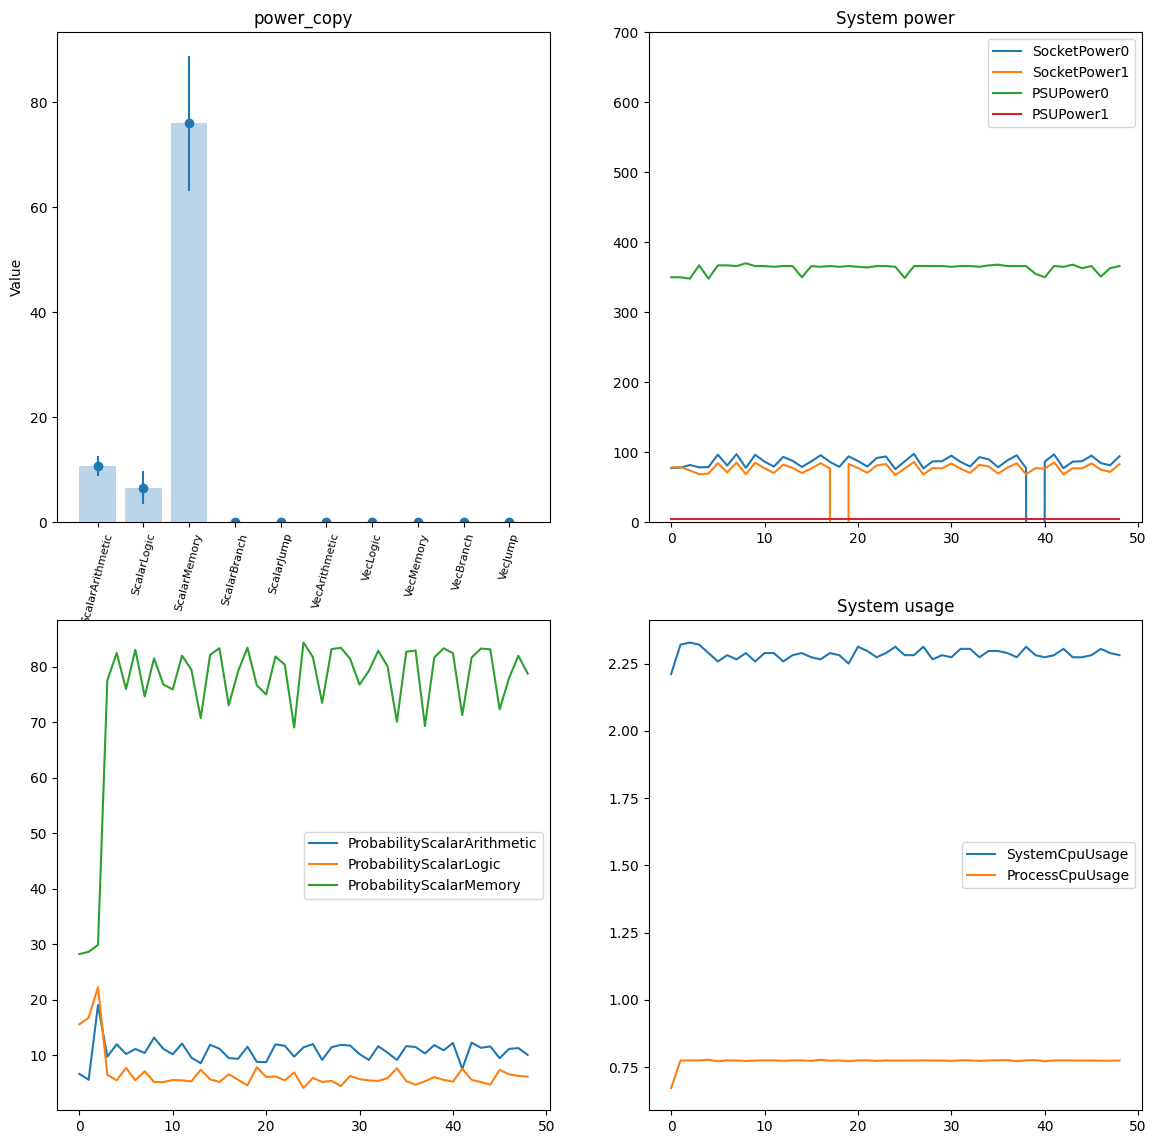

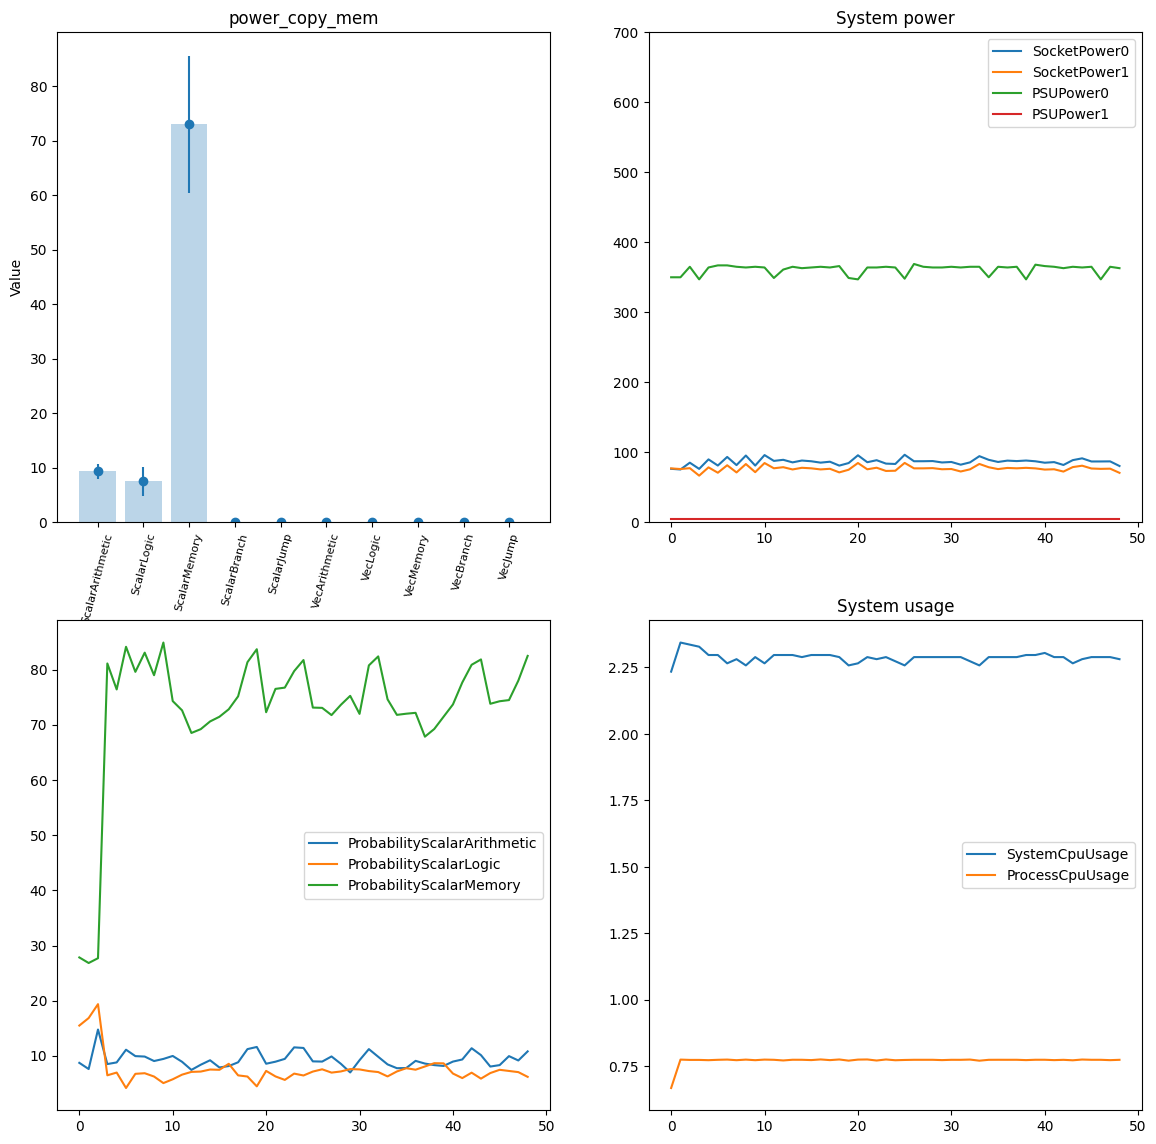

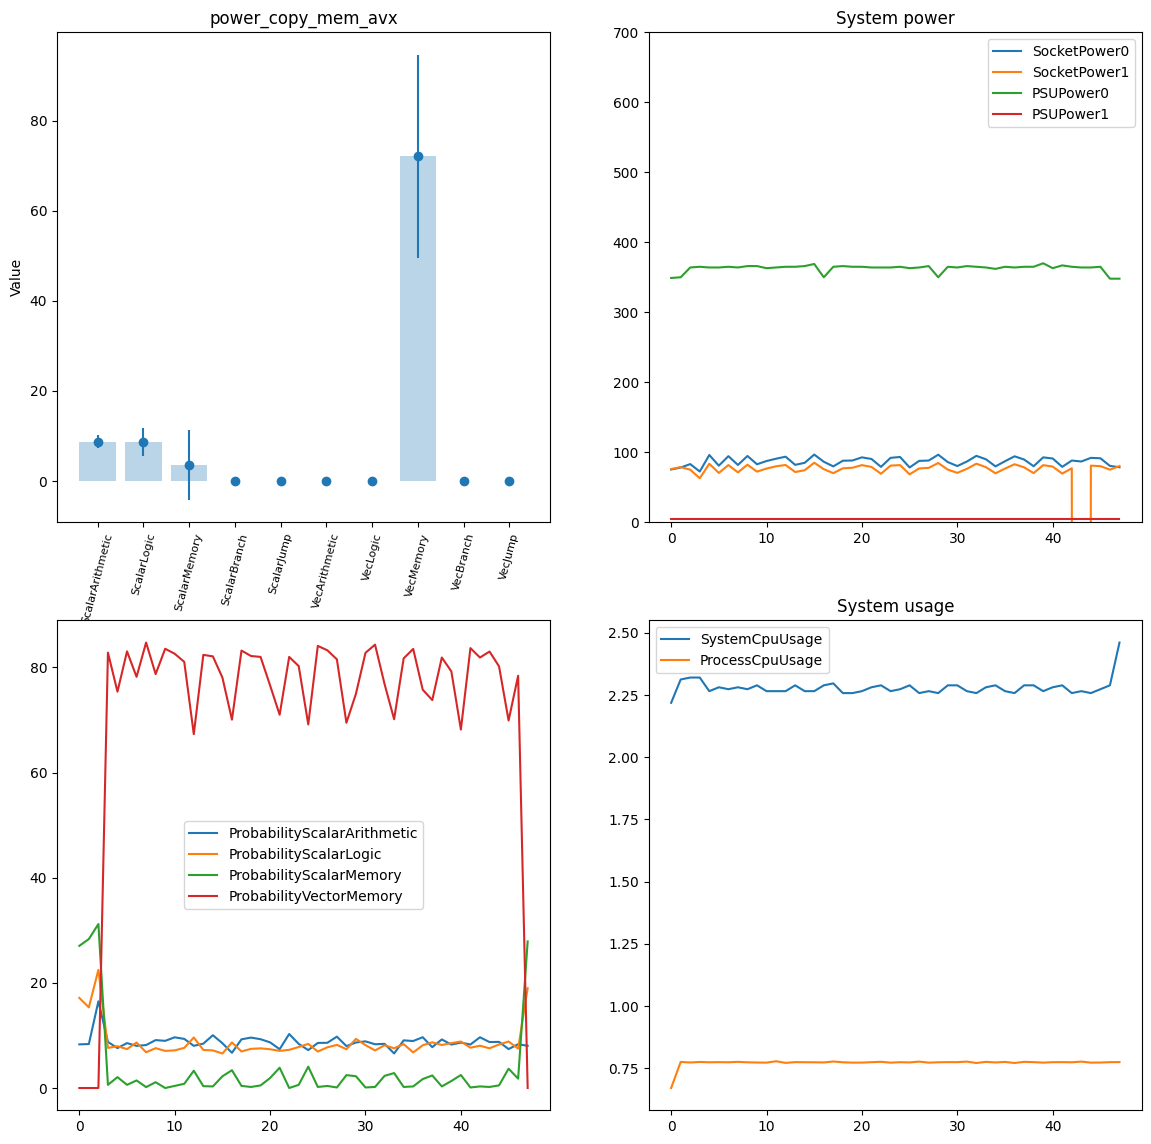

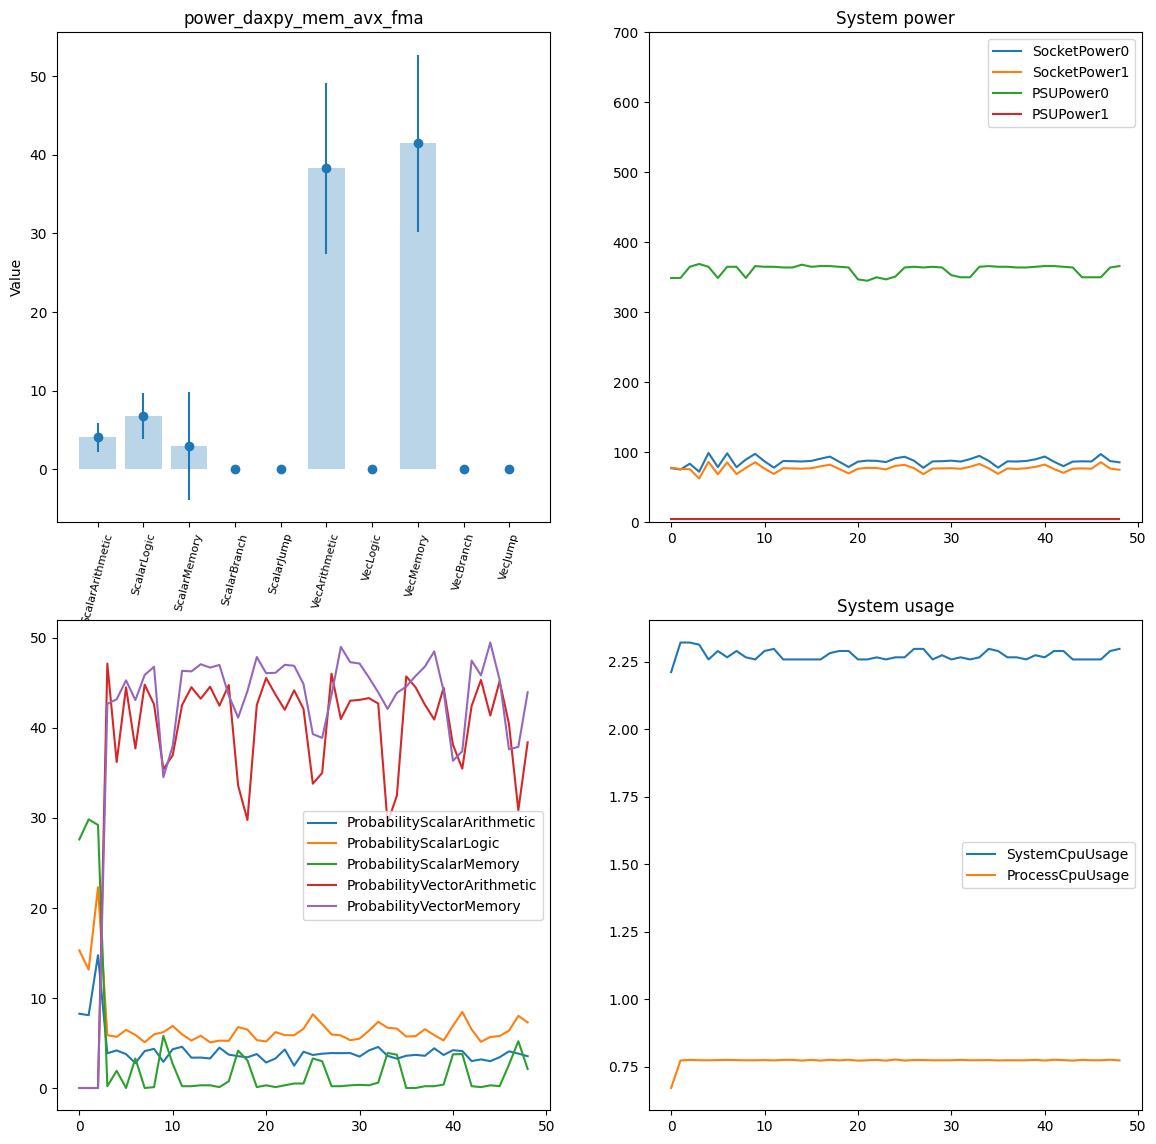

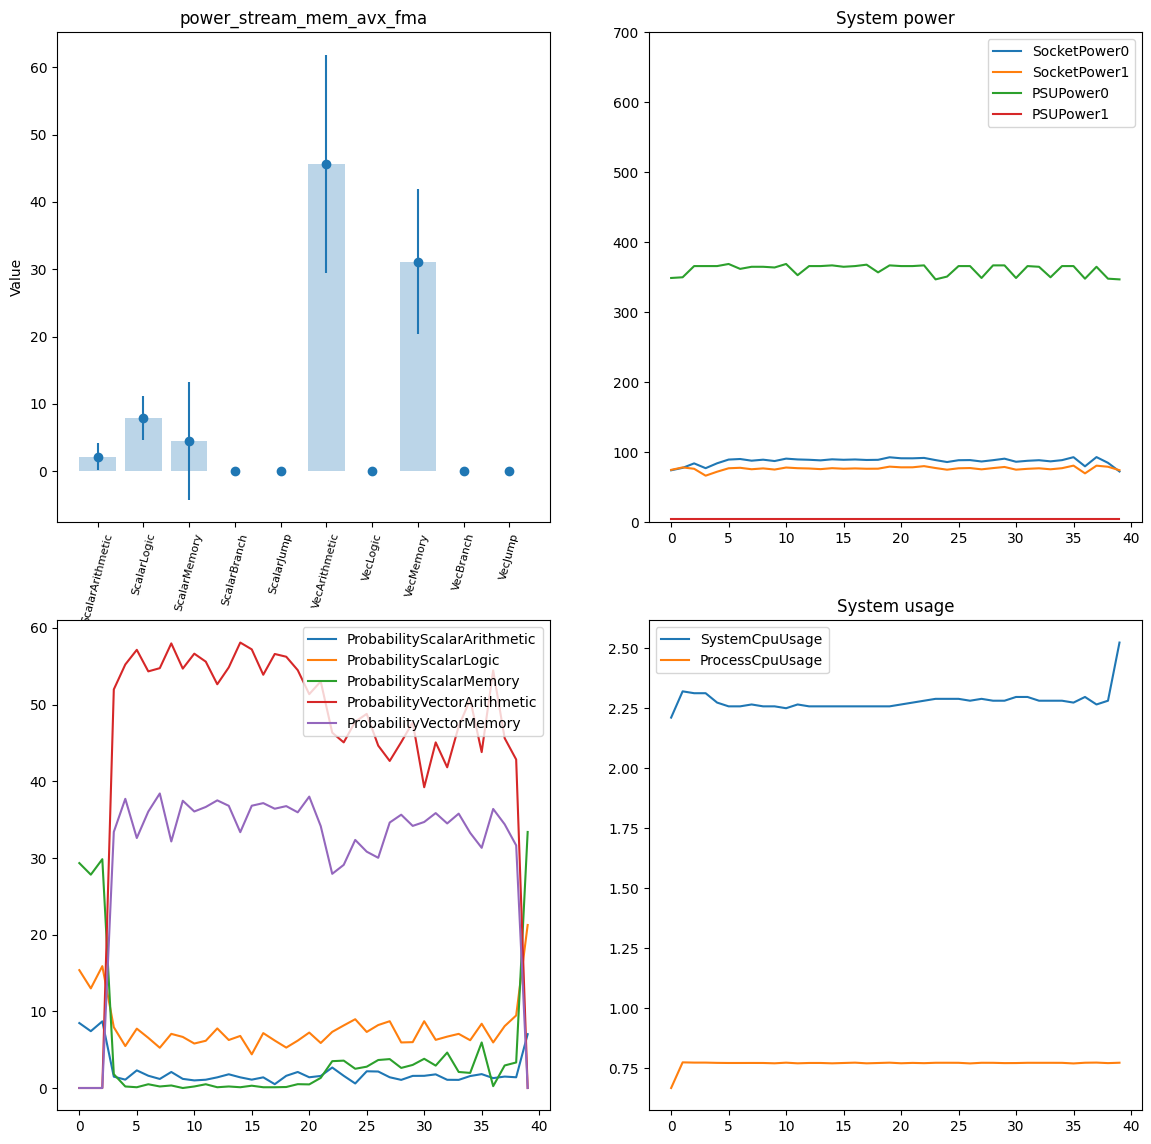

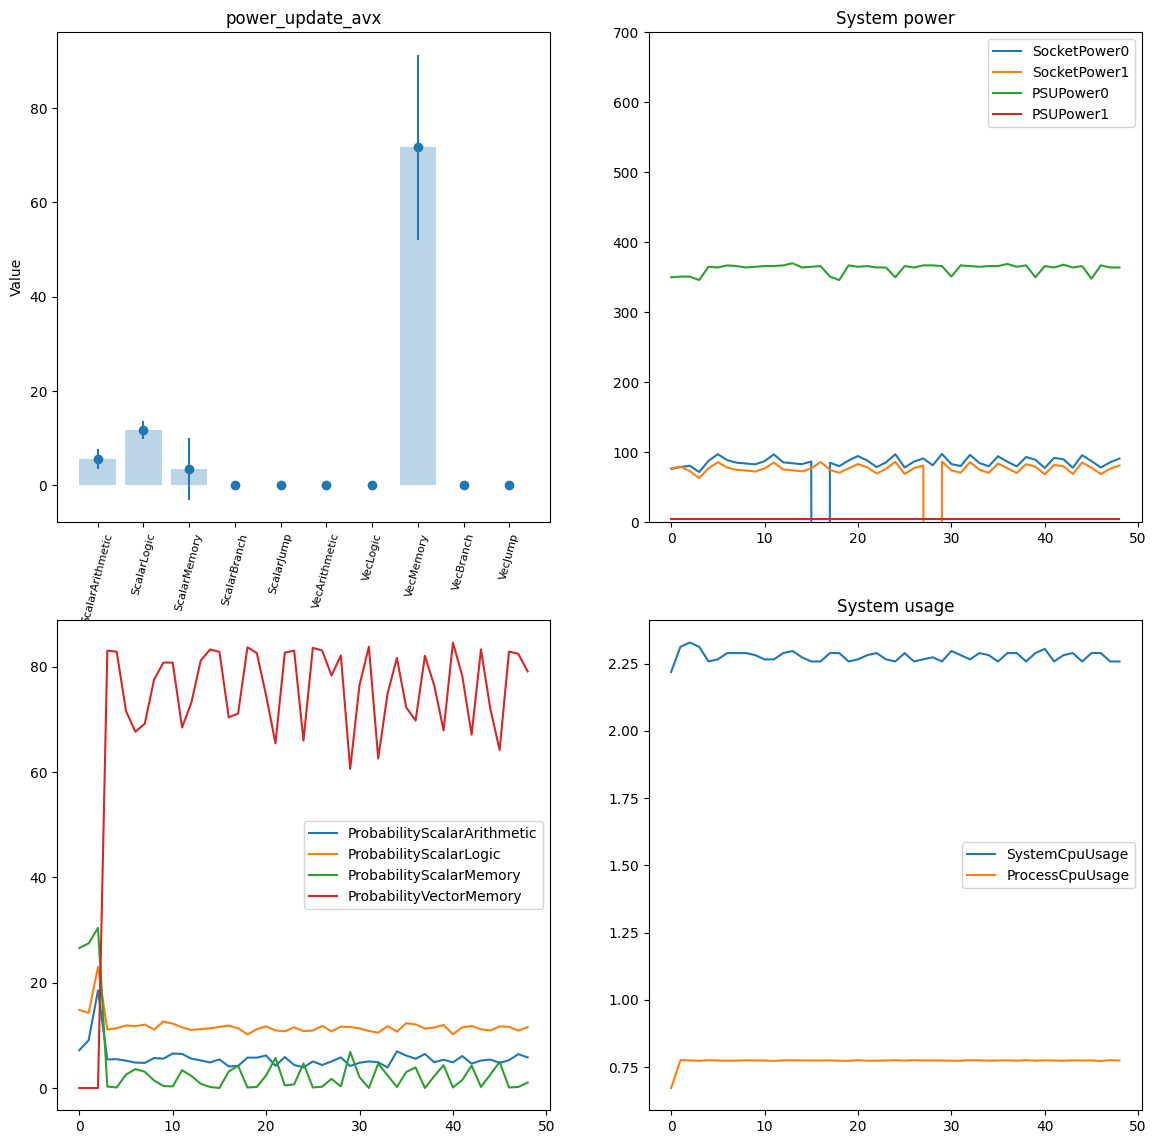

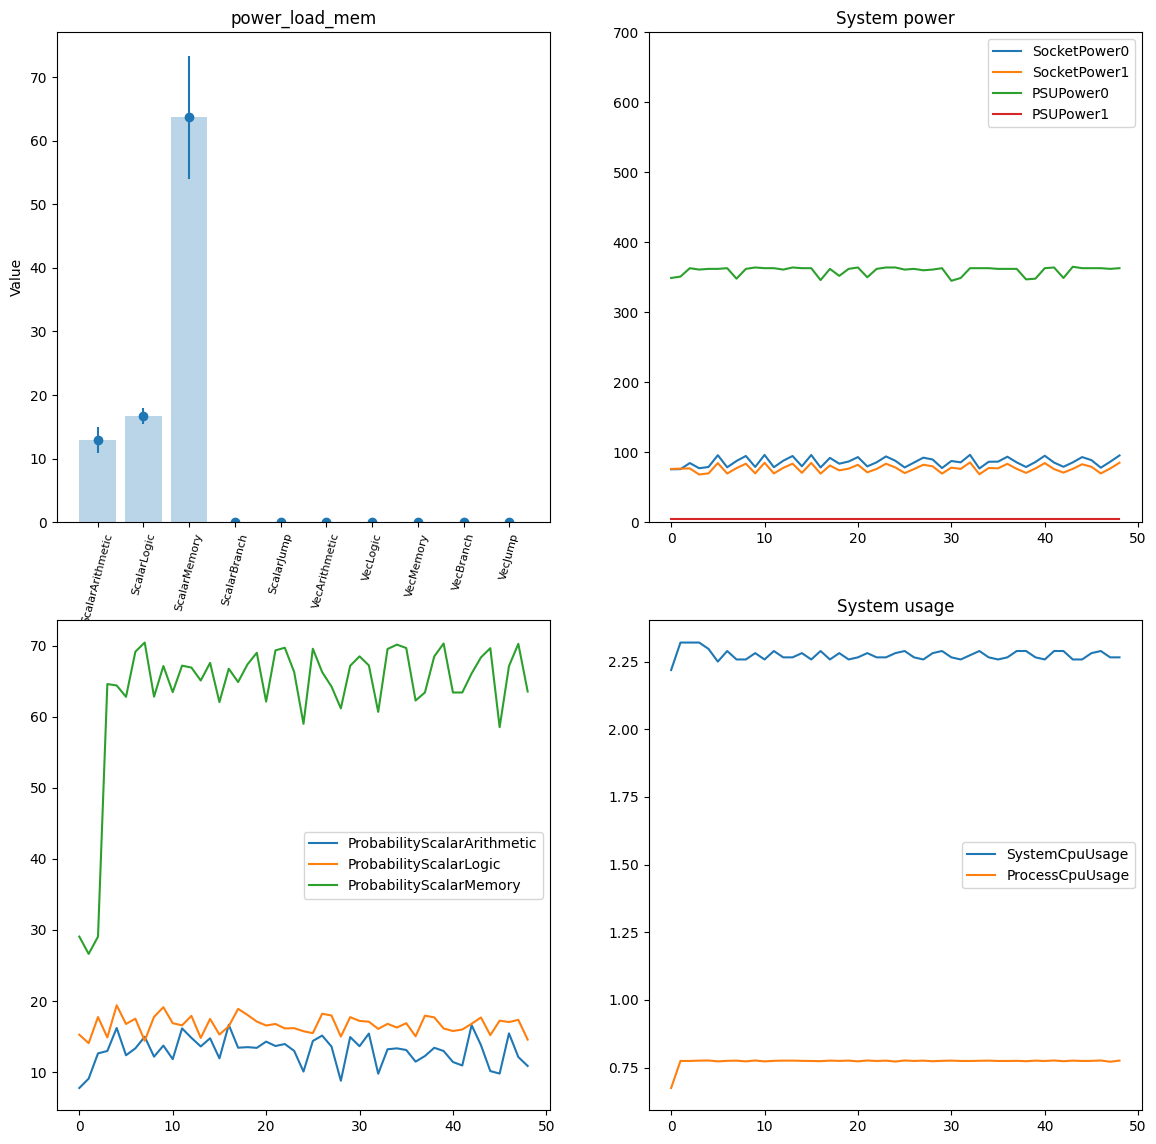

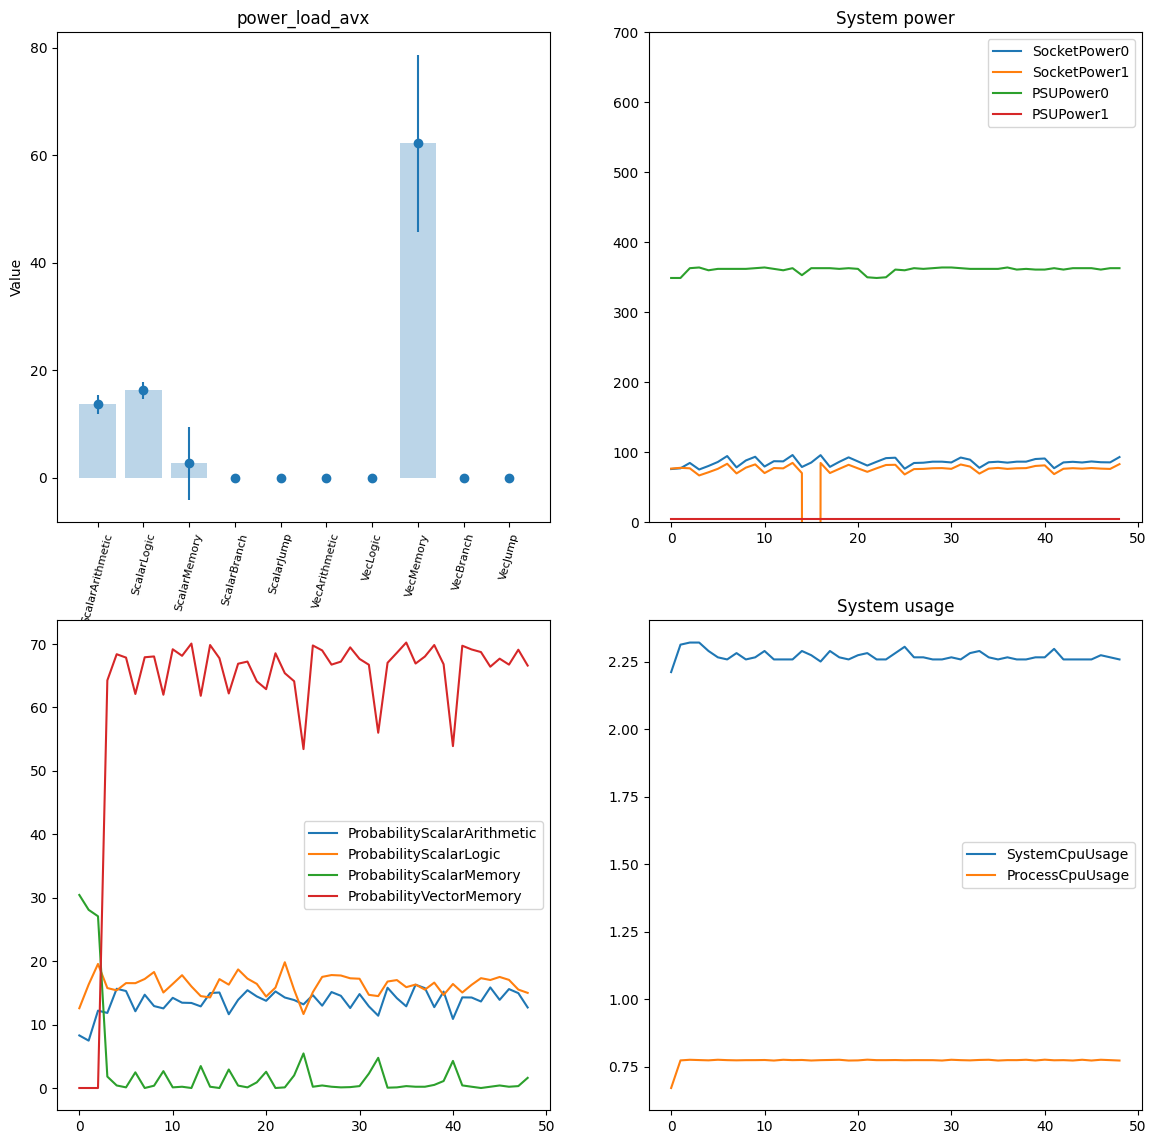

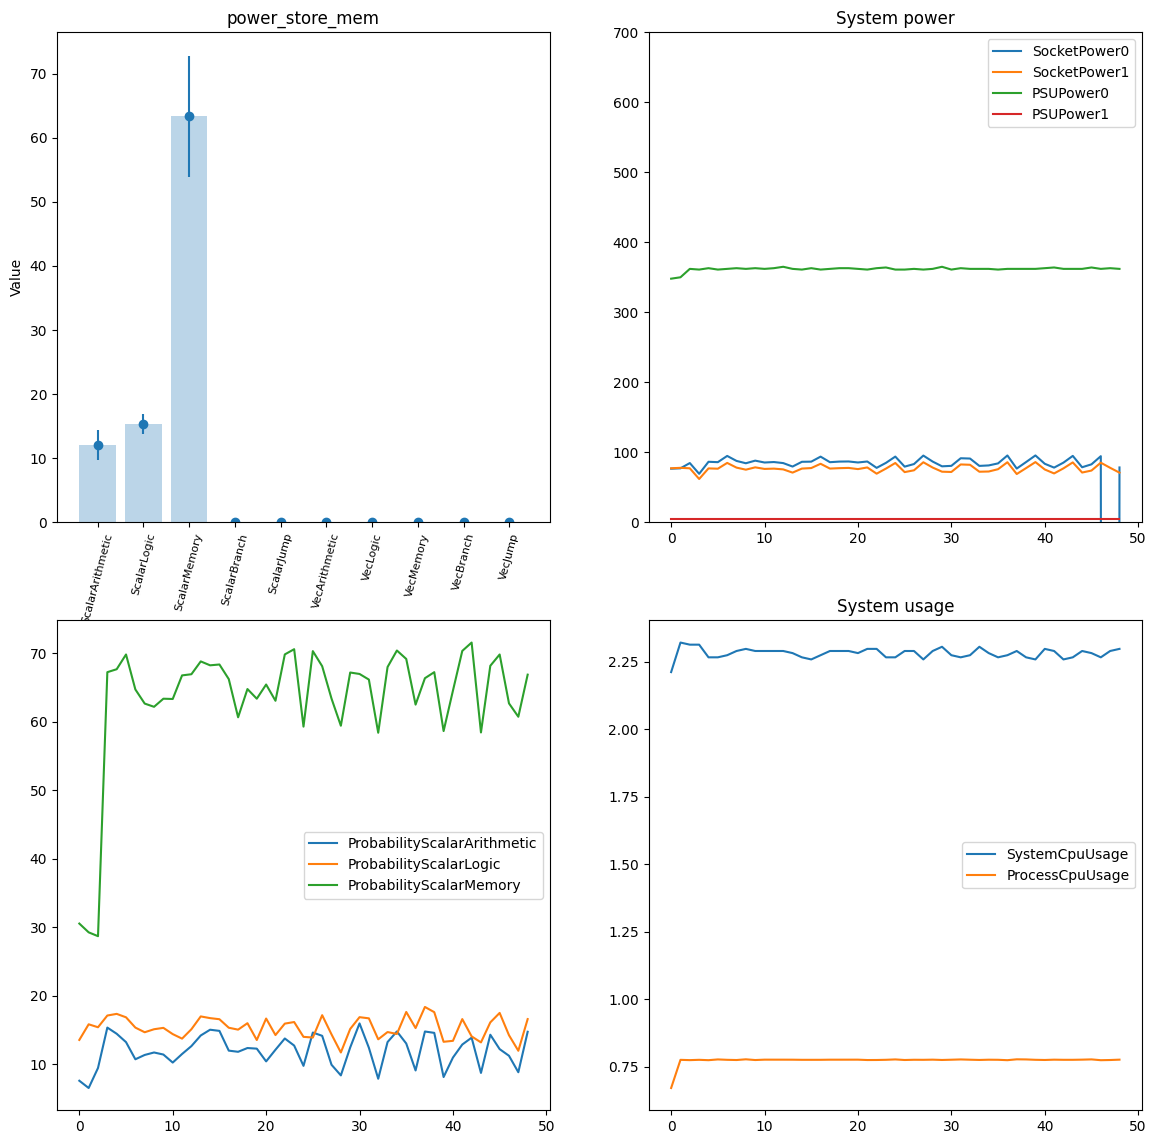

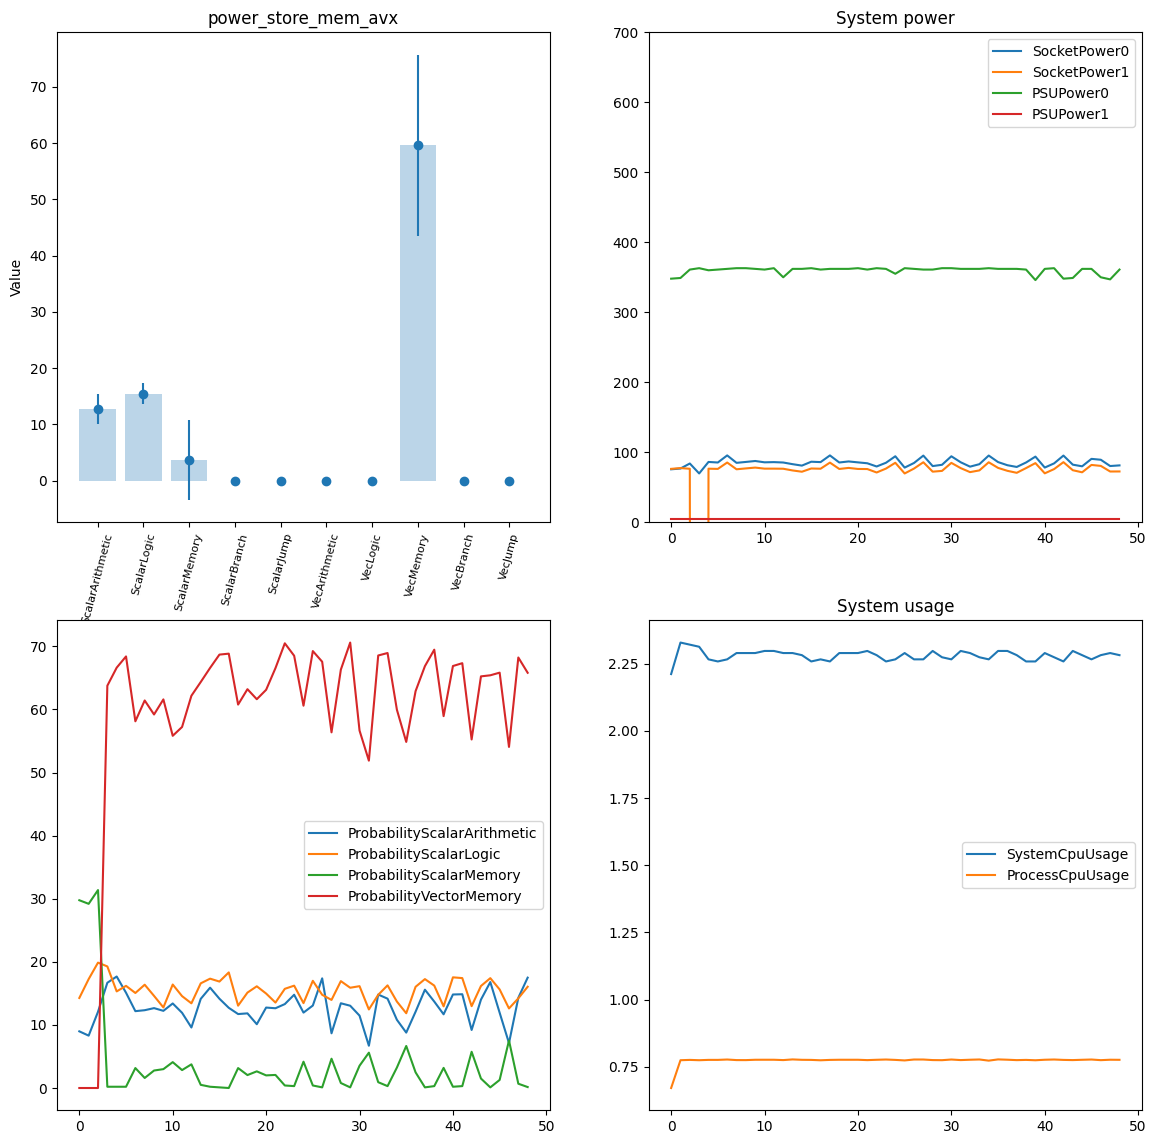

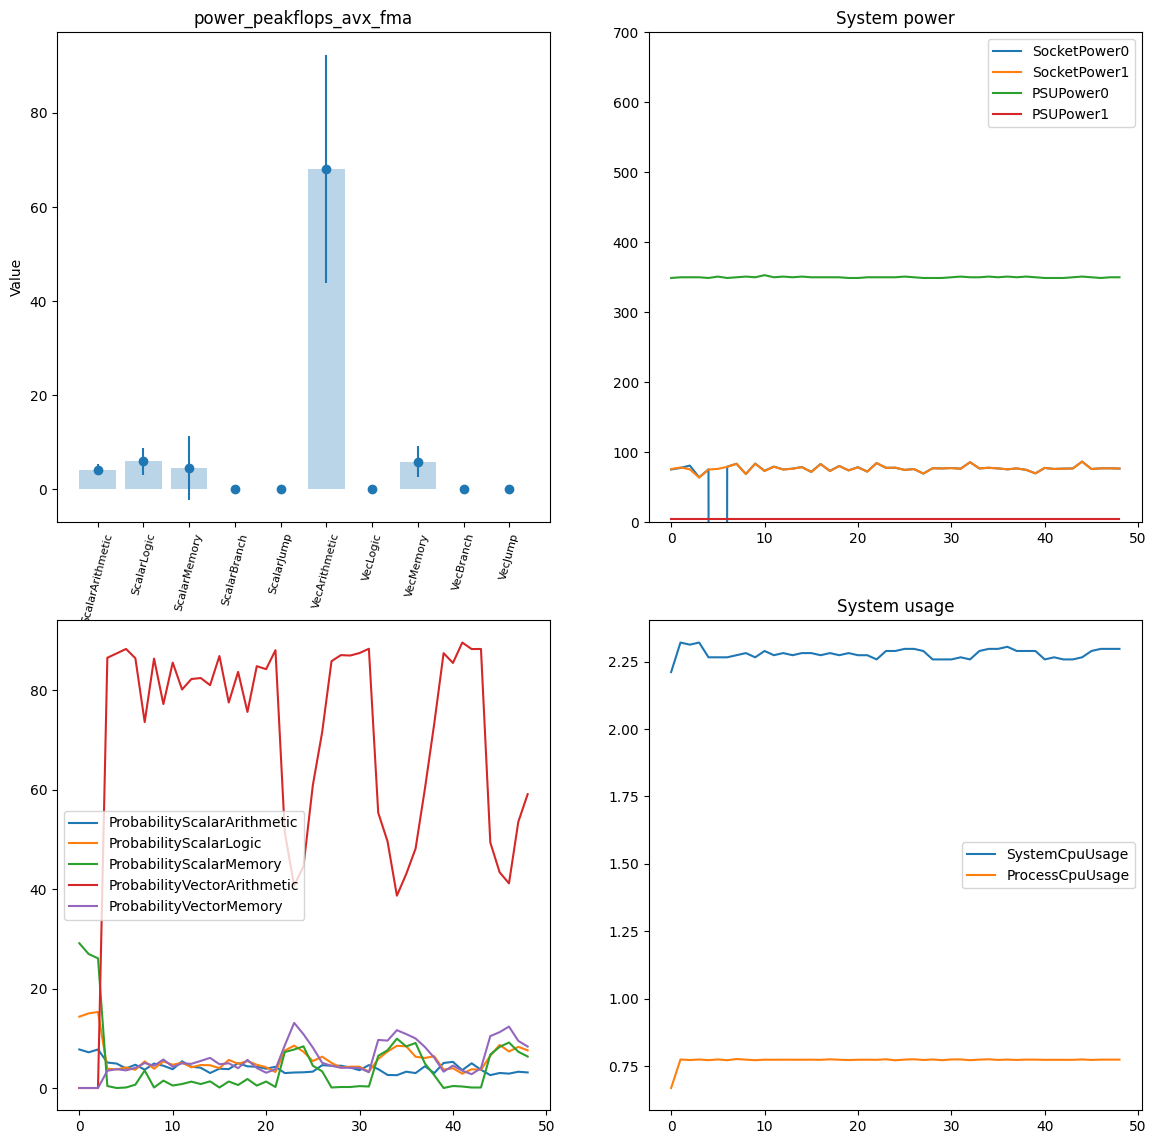

In [916]:
directory_list=["results_1500/results_fan"]

df_list=list()
for directory in directory_list:
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            try:
                df = pd.read_csv(os.path.join(directory, filename))
                df_list.append(df)
                print(f"Opened file: {filename}")
                #print(df.head())  # prints the first 5 rows of each CSV file
                plot(df,os.path.basename(filename).split(".")[0])
            except Exception as e:
                print(e)

In [897]:
df = pd.concat(df_list)

In [898]:
df = df[ (df["SocketPower0"] > 0) & (df["SocketPower1"] > 0) ]

In [899]:
import numpy as np
from scipy.optimize import nnls

# naive model

In [939]:
independent_variables=[ #"SocketPower0","SocketPower1",
                        "ProbabilityScalarArithmetic",
                       "ProbabilityScalarLogic", 	"ProbabilityScalarMemory",
                       "ProbabilityScalarBranch", 	"ProbabilityScalarJump",
                       "ProbabilityVectorArithmetic", 	"ProbabilityVectorLogic",
                       "ProbabilityVectorMemory", 	"ProbabilityVectorBranch",
                       "ProbabilityVectorJump"]#, 	"ProcessCpuUsage"]

In [940]:
df["Total_power"]=df["PSUPower0"]+df["PSUPower1"]

In [941]:
A=df[independent_variables].to_numpy()
b=np.ones((A.shape[0],1))
A=np.hstack((A,b))

coeff,error=nnls(A, df["Total_power"].to_numpy())
intercept=coeff[-1]

print(f"Residual {error}, intercept {intercept}")
for nome,val in zip(independent_variables,coeff[:-1]):
    print(f"{nome} {val}")


Residual 943.0842558957002, intercept 369.56411542585545
ProbabilityScalarArithmetic 0.23978638927520185
ProbabilityScalarLogic 0.1610789735269334
ProbabilityScalarMemory 0.37285181221848607
ProbabilityScalarBranch 0.0
ProbabilityScalarJump 0.0
ProbabilityVectorArithmetic 0.3826476591498
ProbabilityVectorLogic 0.0
ProbabilityVectorMemory 0.3919417329037871
ProbabilityVectorBranch 0.0
ProbabilityVectorJump 0.0


Text(0.5, 0, 'Predicted value')

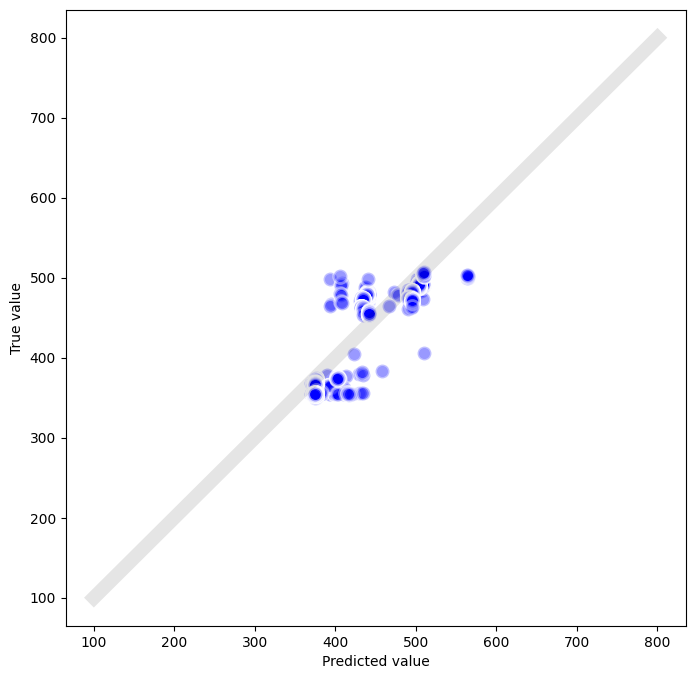

In [942]:
prediction=list()
for row in df[independent_variables].to_numpy():
    prediction.append(row@coeff[:-1] + intercept)

plt.figure(figsize=(8,8))
plt.plot(prediction,df["Total_power"], 'bo', 
         markersize=10, 
         alpha=0.4,
         fillstyle='full',
         markeredgecolor='white',
         markeredgewidth=2)

plt.plot([100,800],[100,800], '-k', linewidth=10, alpha=0.1, label='Bisector Line')
plt.ylabel("True value")
plt.xlabel("Predicted value")

Text(0.5, 0, 'Socket power predicted')

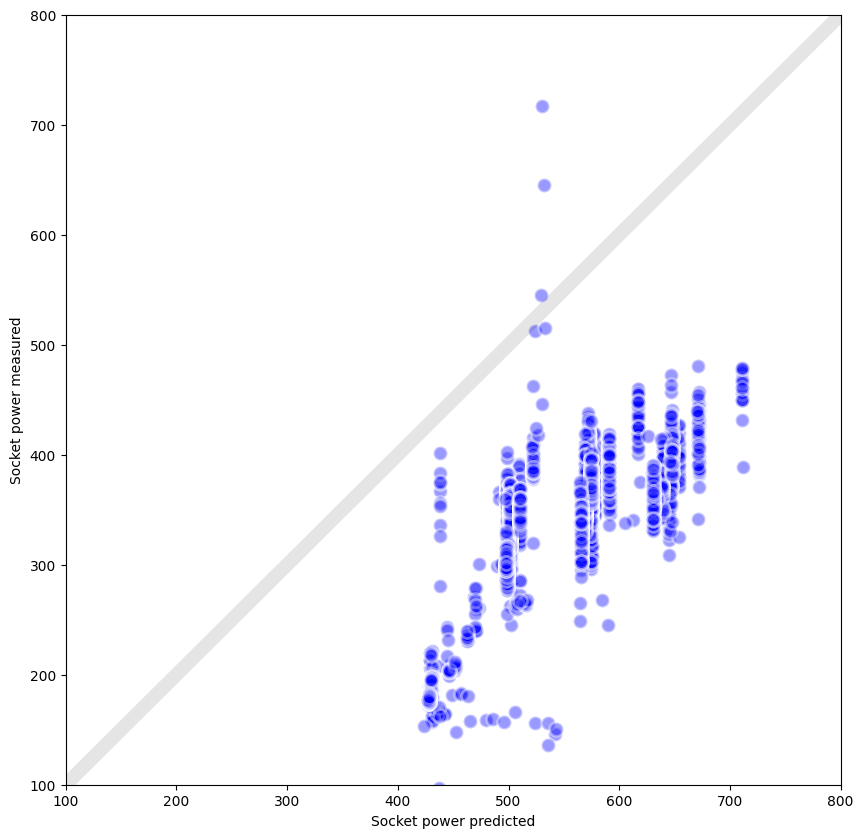

In [804]:
prediction=list()
for row in df[independent_variables].to_numpy():
    prediction.append(row@coeff[:-1] + intercept)

plt.figure(figsize=(10,10))
plt.plot(prediction,df["SocketPower0"]+df["SocketPower1"], 'bo', 
         markersize=10, 
         alpha=0.4,
         fillstyle='full',
         markeredgecolor='white',
         markeredgewidth=2)

plt.plot([100,800],[100,800], '-k', linewidth=10, alpha=0.1, label='Bisector Line')
plt.ylim([100,800])
plt.xlim([100,800])
plt.ylabel("Socket power measured")
plt.xlabel("Socket power predicted")

# Smarter model, paper model

In [943]:
def normalize(df):
    percentages=independent_variables=["ProbabilityScalarArithmetic",
                       "ProbabilityScalarLogic", 	"ProbabilityScalarMemory",
                       "ProbabilityScalarBranch", 	"ProbabilityScalarJump",
                       "ProbabilityVectorArithmetic", 	"ProbabilityVectorLogic",
                       "ProbabilityVectorMemory", 	"ProbabilityVectorBranch",
                       "ProbabilityVectorJump"]
    df[percentages]=df[percentages]/100
    df["SystemCpuUsage"]=df["SystemCpuUsage"]/128
    df["ProcessCpuUsage"]=df["ProcessCpuUsage"]/128
    df["Total_power"]=df["PSUPower0"]+df["PSUPower1"]
    df["Total_socket"]=df["SocketPower0"]+df["SocketPower1"]
    TDP=280

    for var in independent_variables:
        df[var]=df[var]*df["SystemCpuUsage"]*TDP*2
    df = df[ (df["SocketPower0"] > 0) & (df["SocketPower1"] > 0) ]
        
    
    return df

In [952]:
def load_df_list_train():
    directory_list=["results_1500/results_32","results_1500/results_64",
                    "results_1500/results_fan","results_1500/results_96",
                    "results_1500/results_128","results_1500/results_sleep"]
    #directory_list=["results_sleep","results_fan","results_32"]
    df_list=list()
    for directory in directory_list:
        for filename in os.listdir(directory):
            if filename.endswith(".csv"):
                try:
                    df = pd.read_csv(os.path.join(directory, filename))
                    
                    df_list.append(df)
                    #print(type(df_list[-1]))
                    #print(f"Opened file: {filename}")
                    #print(df.head())  # prints the first 5 rows of each CSV file
                    #plot(df,os.path.basename(filename).split(".")[0])
                except Exception as e:
                    print(e)
    return df_list
    
def load_df_list_test():
    directory_list=["results_1500/results_32","results_1500/results_64",
                    "results_1500/results_fan","results_1500/results_96",
                    "results_1500/results_128","results_1500/results_sleep"]
    
    df_list=list()
    for directory in directory_list:
        for filename in os.listdir(directory):
            if filename.endswith(".csv"):
                try:
                    df = pd.read_csv(os.path.join(directory, filename))
                    
                    df_list.append(df)
                    #print(type(df_list[-1]))
                    #print(f"Opened file: {filename}")
                    #print(df.head())  # prints the first 5 rows of each CSV file
                    #plot(df,os.path.basename(filename).split(".")[0])
                except Exception as e:
                    print(e)
    return df_list


In [953]:
df_list_train= load_df_list_train()
df = pd.concat([ i  for i in df_list_train if i is not None])
df["SocketPower0"].max()

/tmp/ipykernel_1241276/3725529913.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([ i  for i in df_list_train if i is not None])


155.302

In [954]:
independent_variables=[ "ProbabilityScalarArithmetic",
                       "ProbabilityScalarLogic", 	"ProbabilityScalarMemory",
                       "ProbabilityScalarBranch", 	"ProbabilityScalarJump",
                       "ProbabilityVectorArithmetic", 	"ProbabilityVectorLogic",
                       "ProbabilityVectorMemory", 	"ProbabilityVectorBranch",
                       "ProbabilityVectorJump"]#,"SocketPower0","SocketPower1"]
df_list_train= load_df_list_train()
df = pd.concat(df_list_train)
df = normalize(df)

/tmp/ipykernel_1241276/538068423.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(df_list_train)


In [957]:
df

Timestamp  SocketPower0  SocketPower1  ProbabilityScalarArithmetic  \
0   16537780       76.4111       78.2523                     0.716337   
1   16545810       82.3012       84.2923                     0.812235   
2   16554070      117.6330      119.1690                    15.418831   
3   16562440      105.8000      107.1970                    15.496194   
4   16570060      117.6040      119.1660                    15.176449   
..       ...           ...           ...                          ...   
44  38236050      126.6040      128.3090                     0.394940   
45  38248670      129.3220      131.0670                     0.460954   
46  38261010      128.9500      130.7010                     0.493982   
47  38273070      128.4350      130.1440                     0.493572   
48  38284790      136.7450      138.5940                     0.428162   

    ProbabilityScalarLogic  ProbabilityScalarMemory ProbabilityScalarBranch  \
0                16.271086                26.381673                     0.0   
1                18.589878                28.748532                     0.0   
2                 3.743102                94.355921                     0.0   
3                 3.711321                94.575885                     0.0   
4                 3.460093                95.203955                     0.0   
..                     ...                      ...                     ...   
44               27.152101                 0.000000                     0.0   
45               26.899960                 0.000000                     0.0   
46               26.938468                 0.065864                     0.0   
47               27.179339                 0.000000                     0.0   
48               26.908324                 0.000000                     0.0   

   ProbabilityScalarJump  ProbabilityVectorArithmetic ProbabilityVectorLogic  \
0                    0.0                     0.000000                    0.0   
1                    0.0                     0.000000                    0.0   
2                    0.0                     0.000000                    0.0   
3                    0.0                     0.000000                    0.0   
4                    0.0                     0.000000                    0.0   
..                   ...                          ...                    ...   
44                   0.0                   163.768308                    0.0   
45                   0.0                   164.395960                    0.0   
46                   0.0                   164.133649                    0.0   
47                   0.0                   164.030272                    0.0   
48                   0.0                   164.809367                    0.0   

    ProbabilityVectorMemory ProbabilityVectorBranch ProbabilityVectorJump  \
0                  0.000000                     0.0                   0.0   
1                  0.000000                     0.0                   0.0   
2                  0.000000                     0.0                   0.0   
3                  0.000000                     0.0                   0.0   
4                  0.000000                     0.0                   0.0   
..                      ...                     ...                   ...   
44               136.583296                     0.0                   0.0   
45               136.244840                     0.0                   0.0   
46               137.030520                     0.0                   0.0   
47               136.785124                     0.0                   0.0   
48               136.484816                     0.0                   0.0   

   PSUPower0 PSUPower1  SystemCpuUsage  ProcessCpuUsage TimeDifference  \
0        360         5        0.182739         0.172054           8360   
1        360         5        0.204284         0.193792           8030   
2        477         5        0.204407         0.193892           826

In [955]:
A=df[independent_variables].to_numpy()

b=np.ones((A.shape[0],1))

A=np.hstack((A,b))

coeff,error=nnls(A, df["Total_power"].to_numpy(), maxiter=1000,atol=max(A.shape) * np.linalg.norm(A, 1) * np.spacing(1.))
intercept=coeff[-1]
print(f"Residual {error}, intercept {intercept}")
#print(coeff)

for name,value in zip(independent_variables,coeff):
    print(name,value)

ValueError: object arrays are not supported

/tmp/ipykernel_1241276/2712995539.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(df_list_test)


Text(0.5, 0, 'Predicted value')

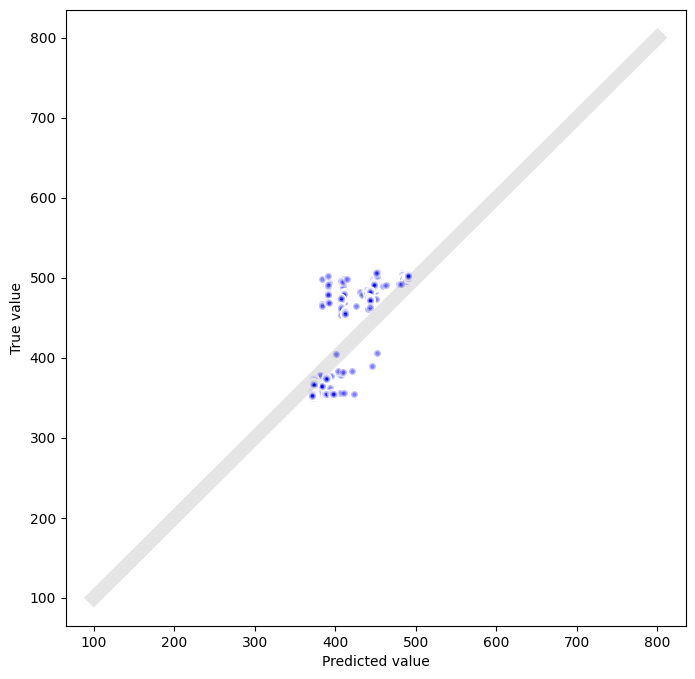

In [956]:
df_list_test= load_df_list_test()
df = pd.concat(df_list_test)
df = normalize(df)
prediction=list()

for row in df[independent_variables].to_numpy():
    prediction.append(row@coeff[:-1] + intercept)

plt.figure(figsize=(8,8))
plt.plot(prediction,df["Total_power"], 'bo', 
         markersize=5, 
         alpha=0.5,
         fillstyle='full',
         markeredgecolor='white',
         markeredgewidth=2)

plt.plot([100,800],[100,800], '-k', linewidth=10, alpha=0.1, label='Bisector Line')
plt.ylabel("True value")
plt.xlabel("Predicted value")

Text(0.5, 0, 'Socket power predicted')

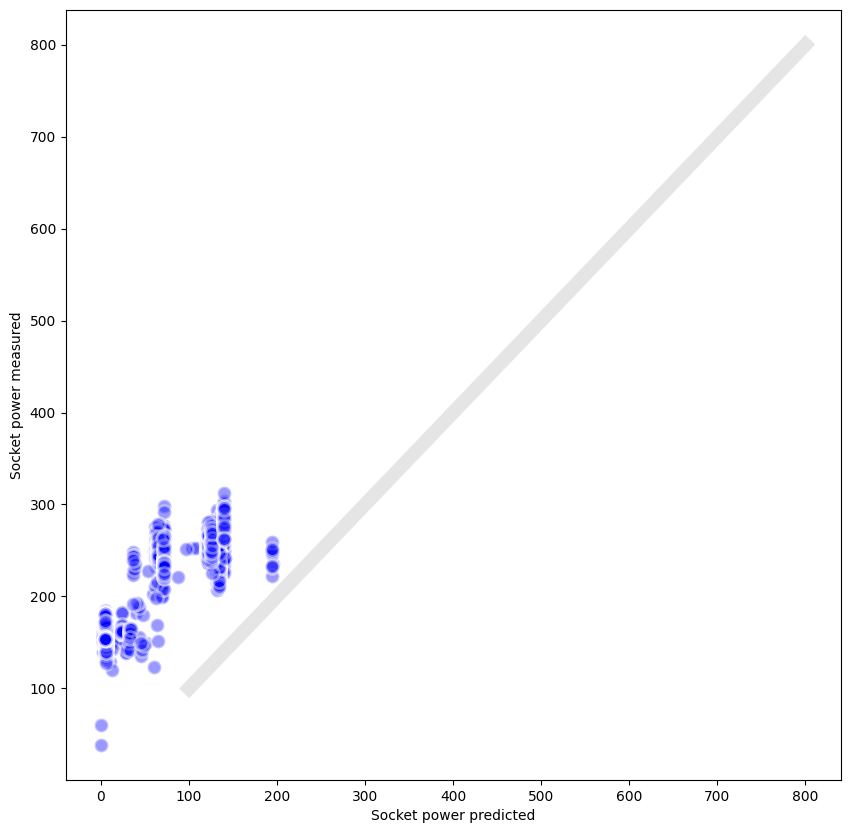

In [928]:
prediction=list()

for row in df[independent_variables].to_numpy():
    prediction.append(row@coeff[:-1])

plt.figure(figsize=(10,10))
plt.plot(prediction,df["SocketPower0"]+df["SocketPower1"], 'bo', 
         markersize=10, 
         alpha=0.4,
         fillstyle='full',
         markeredgecolor='white',
         markeredgewidth=2)

plt.plot([100,800],[100,800], '-k', linewidth=10, alpha=0.1, label='Bisector Line')
plt.ylabel("Socket power measured")
plt.xlabel("Socket power predicted")

In [841]:
def plot(df,name,coeff):
    intercept=coeff[-1]
    coeff=coeff[:-1]
    
    # Your data
    column_name_probability = ['ProbabilityScalarArithmetic',
        'ProbabilityScalarLogic',
        'ProbabilityScalarMemory',
        'ProbabilityScalarBranch',
        'ProbabilityScalarJump',
        'ProbabilityVectorArithmetic',
        'ProbabilityVectorLogic',
        'ProbabilityVectorMemory',
        'ProbabilityVectorBranch',
        'ProbabilityVectorJump']
    
    column_name_probability_labels = ['ScalarArithmetic',
        'ScalarLogic',
        'ScalarMemory',
        'ScalarBranch',
        'ScalarJump',
        'VecArithmetic',
        'VecLogic',
        'VecMemory',
        'VecBranch',
        'VecJump']
    
    plt.figure(figsize=(14,14))

    plt.subplot(2, 2, 1)

    plt.title(name)
    x=range(0,len(column_name_probability))
    
    plt.bar(x=x,height=df[column_name_probability].mean(),alpha=0.3)
    plt.errorbar(x,df[column_name_probability].mean(),yerr=df[column_name_probability].std(), fmt='o')
    #.plot(kind='bar', width=0.8) # Plot bar chart
    #plt.title("ksad") # Set title as column name
    #plt.xlabel(column) # Set x-axis label as column name
    plt.xticks(ticks=x,labels=column_name_probability_labels,rotation=90-15,fontsize=8)
    #plt.xticks(ticks=range(0,len(column_name)),labels=column,rotation=45)
    plt.ylabel('Value') # Set y-axis label as 'Value'
    column_name=["SocketPower0", "SocketPower1","PSUPower0","PSUPower1"]
 #   df = df[ (df["SocketPower0"] > 0) & (df["SocketPower1"] > 0) ]

    plt.subplot(2, 2, 2)
    plt.title("System power")
    _ = plt.plot(df[ (df["SocketPower0"] > 0) & (df["SocketPower1"] > 0) ][column_name],label=column_name)
    df=normalize(df)
   
#    x=(df[column_name_probability+["SocketPower0","SocketPower1"]].to_numpy()@coeff)+intercept
    x=(df[column_name_probability].to_numpy()@coeff)+intercept

    _ = plt.plot(x,label="Predicted")
    
    plt.ylim([0,900])
    plt.legend()
    plt.subplot(2, 2, 3)
    filtered_df = df[column_name_probability].loc[:, df[column_name_probability].mean() > 0]
    plt.plot(filtered_df,label=filtered_df.columns.tolist())
    plt.legend()
    plt.subplot(2, 2, 4)
    plt.title("System usage")
    plt.plot(df[["SystemCpuUsage" ,"ProcessCpuUsage"]],label=["SystemCpuUsage" ,"ProcessCpuUsage"])
    plt.legend()
    plt.savefig(f"{name}.png")

Opened file: power_copy.csv
Opened file: power_copy_mem.csv
Opened file: power_copy_mem_avx.csv
Opened file: power_daxpy_mem_avx_fma.csv
Opened file: power_load_avx.csv
Opened file: power_load_mem.csv
Opened file: power_peakflops_avx_fma.csv
Opened file: power_store_mem.csv
Opened file: power_store_mem_avx.csv
Opened file: power_stream_mem_avx_fma.csv
Opened file: power_update_avx.csv


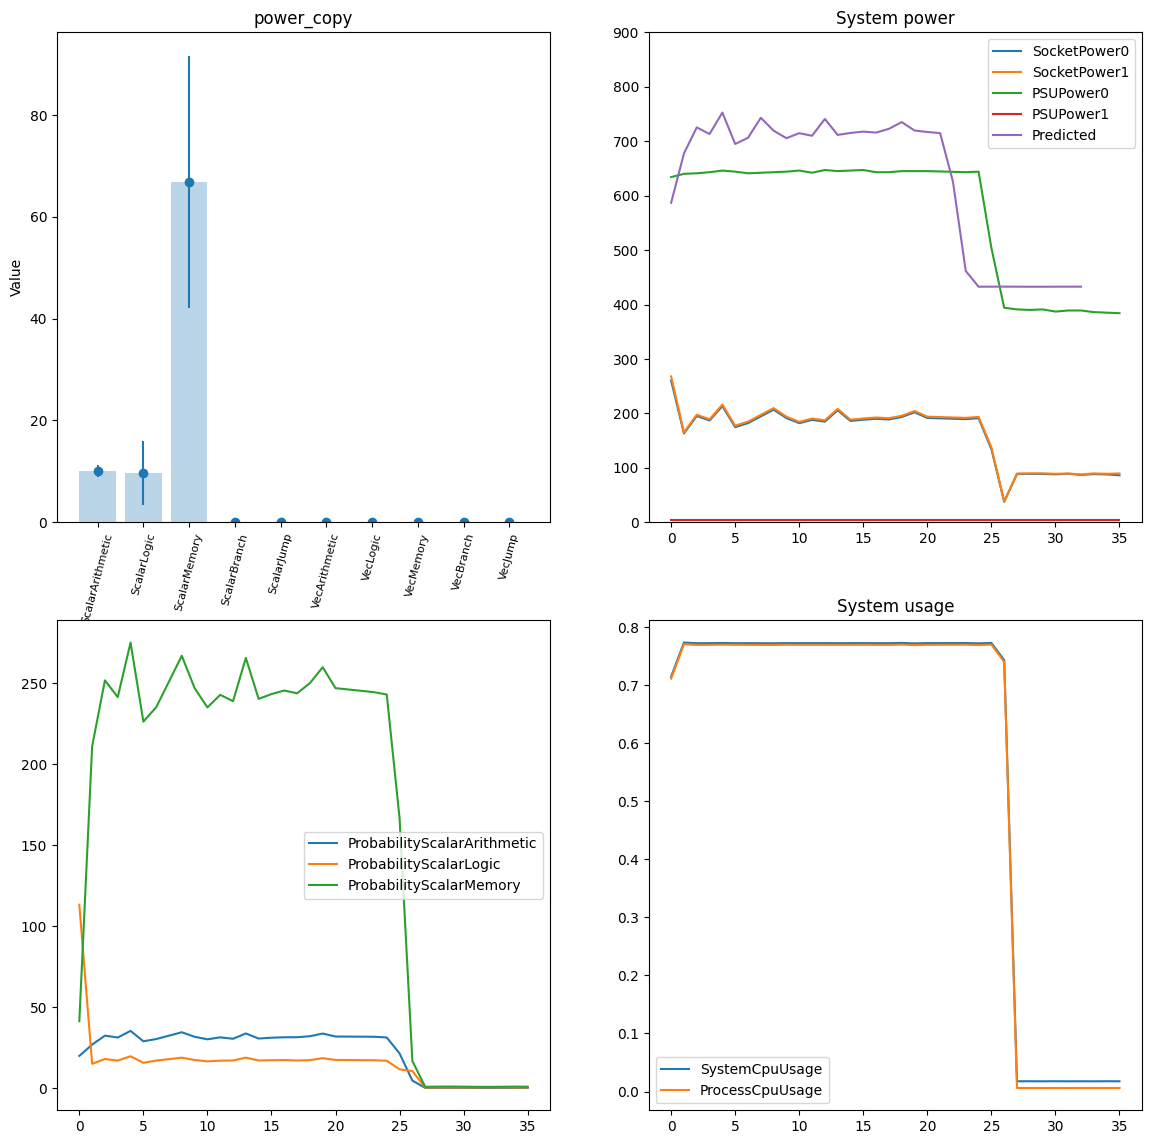

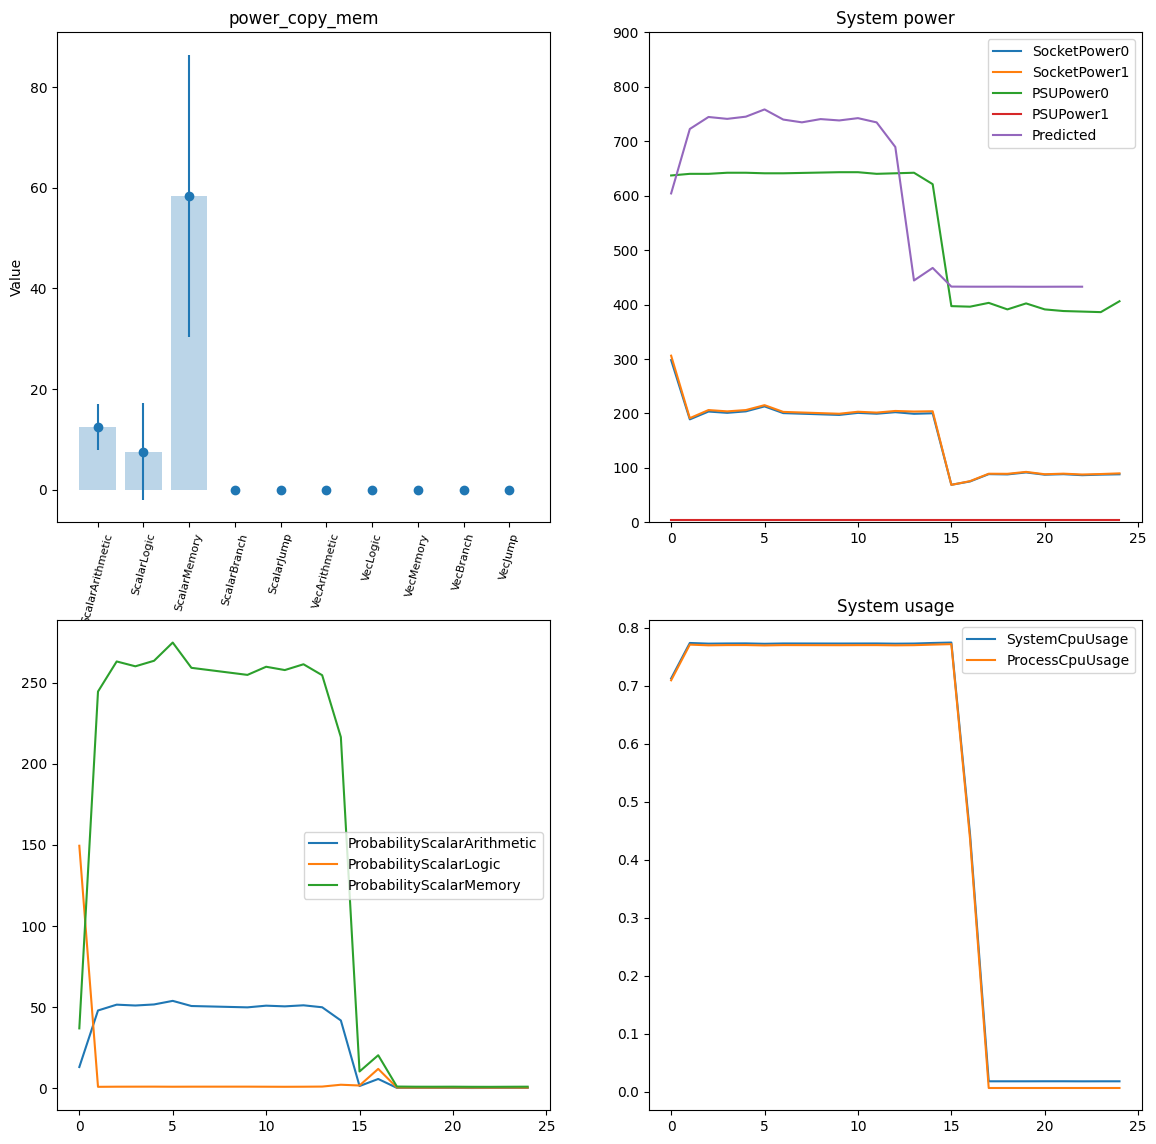

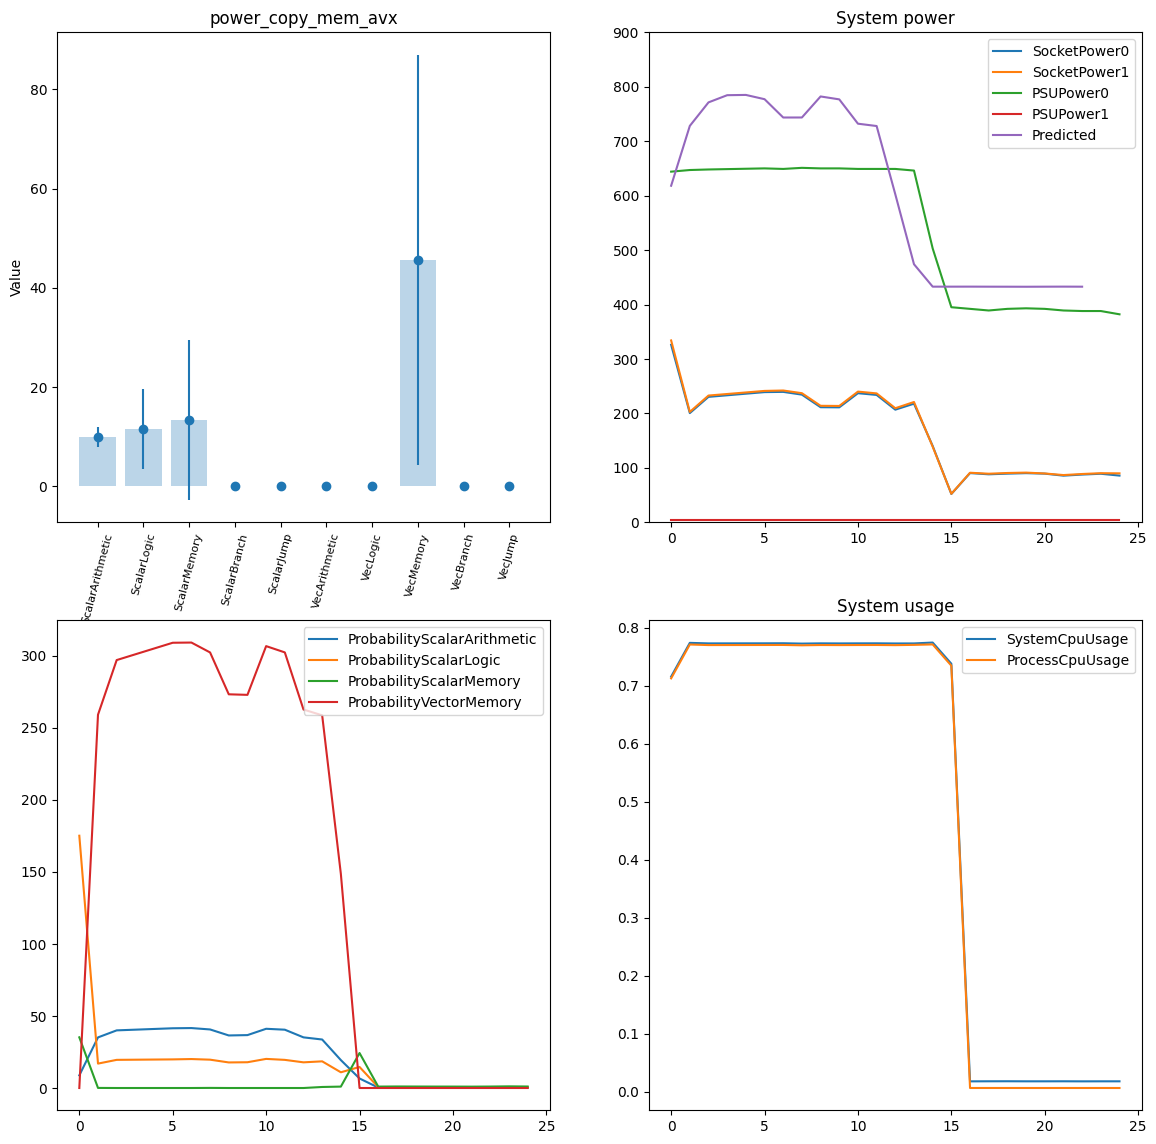

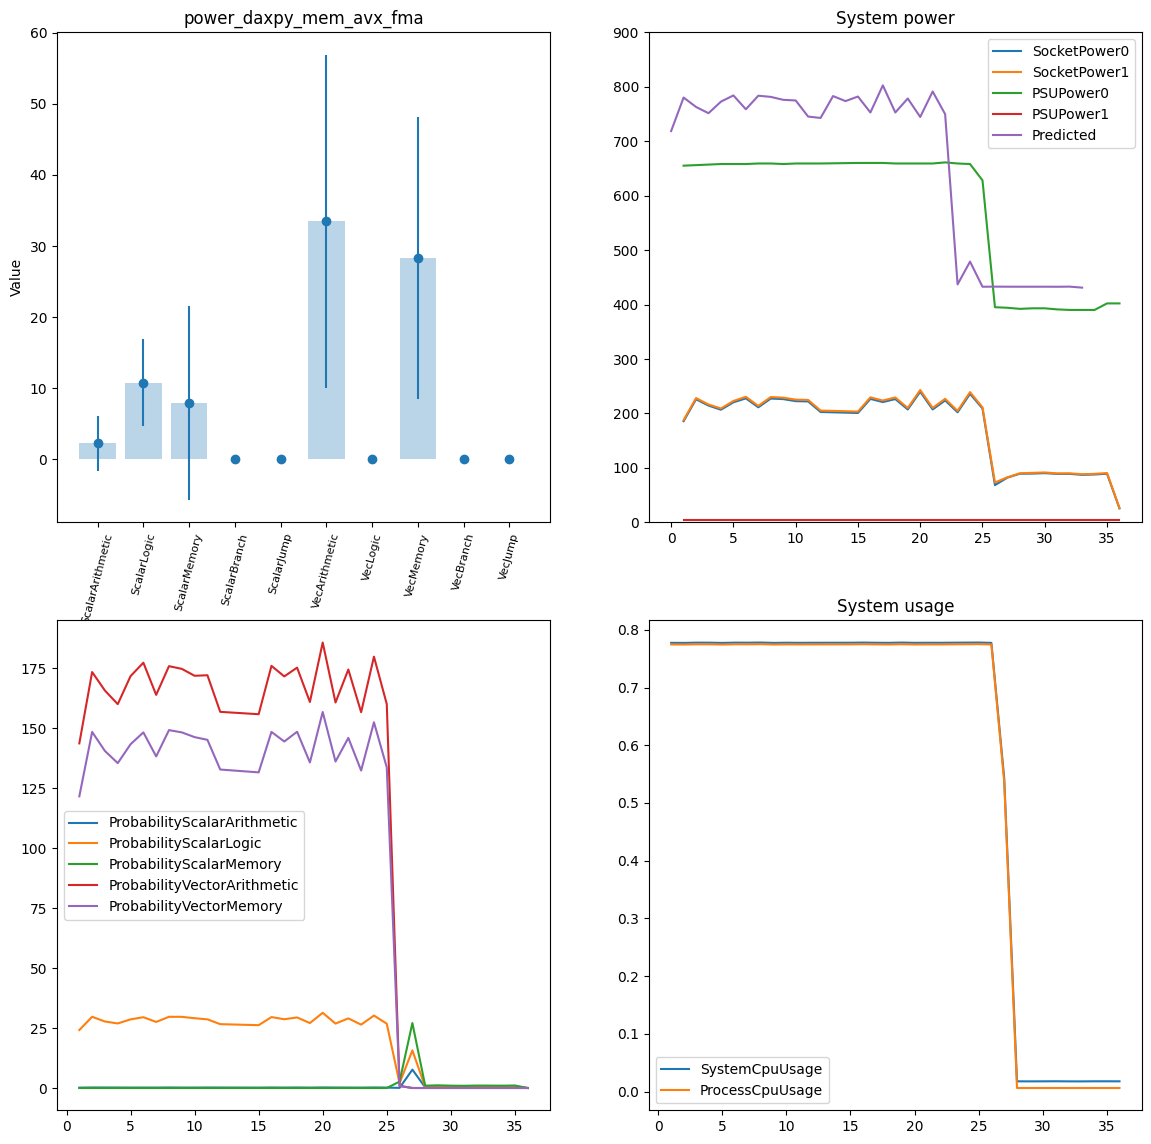

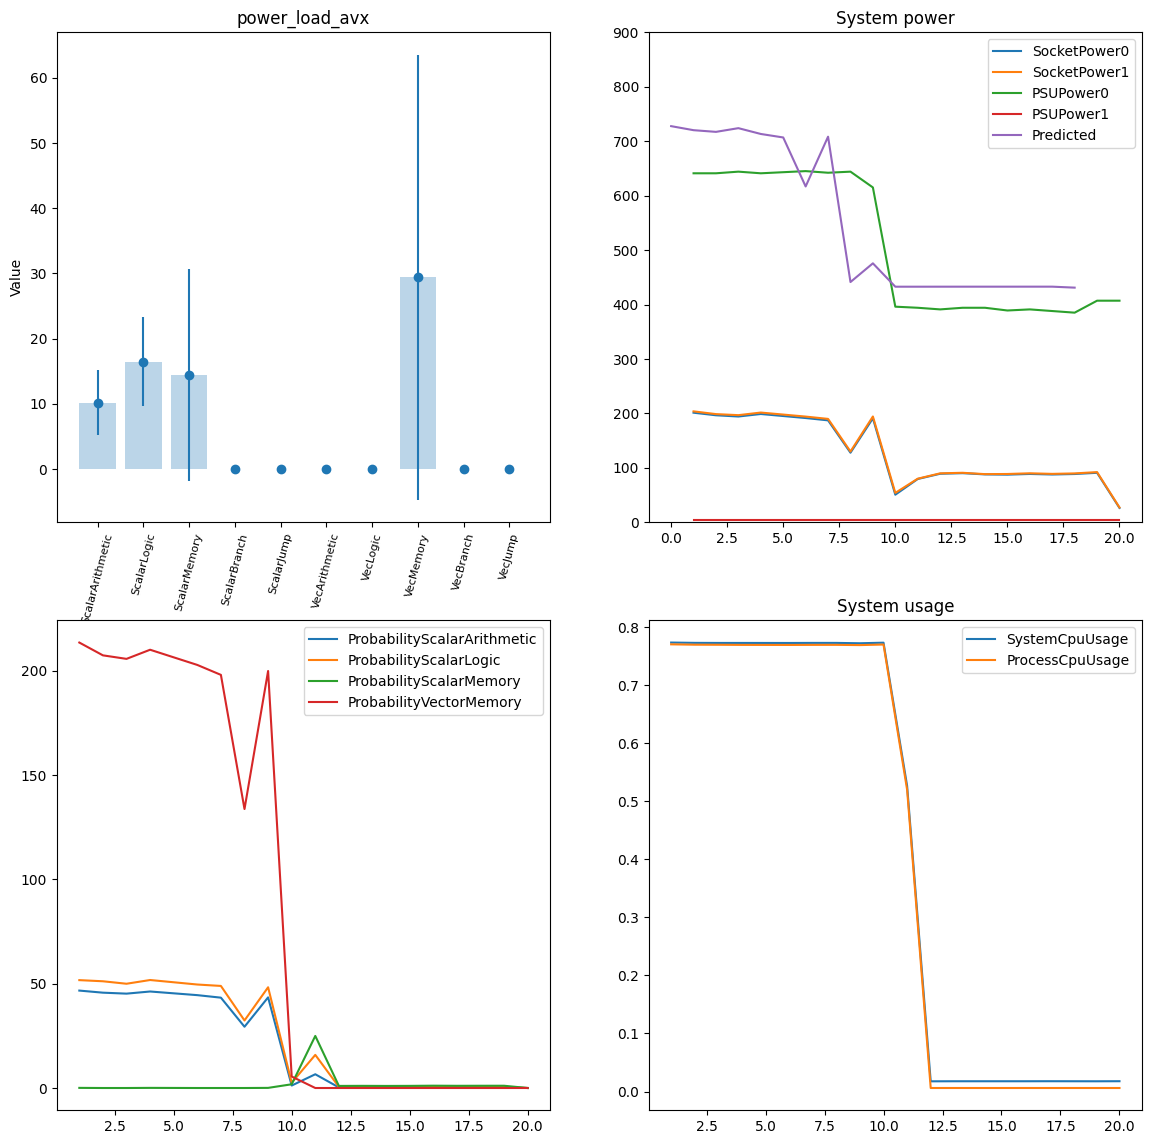

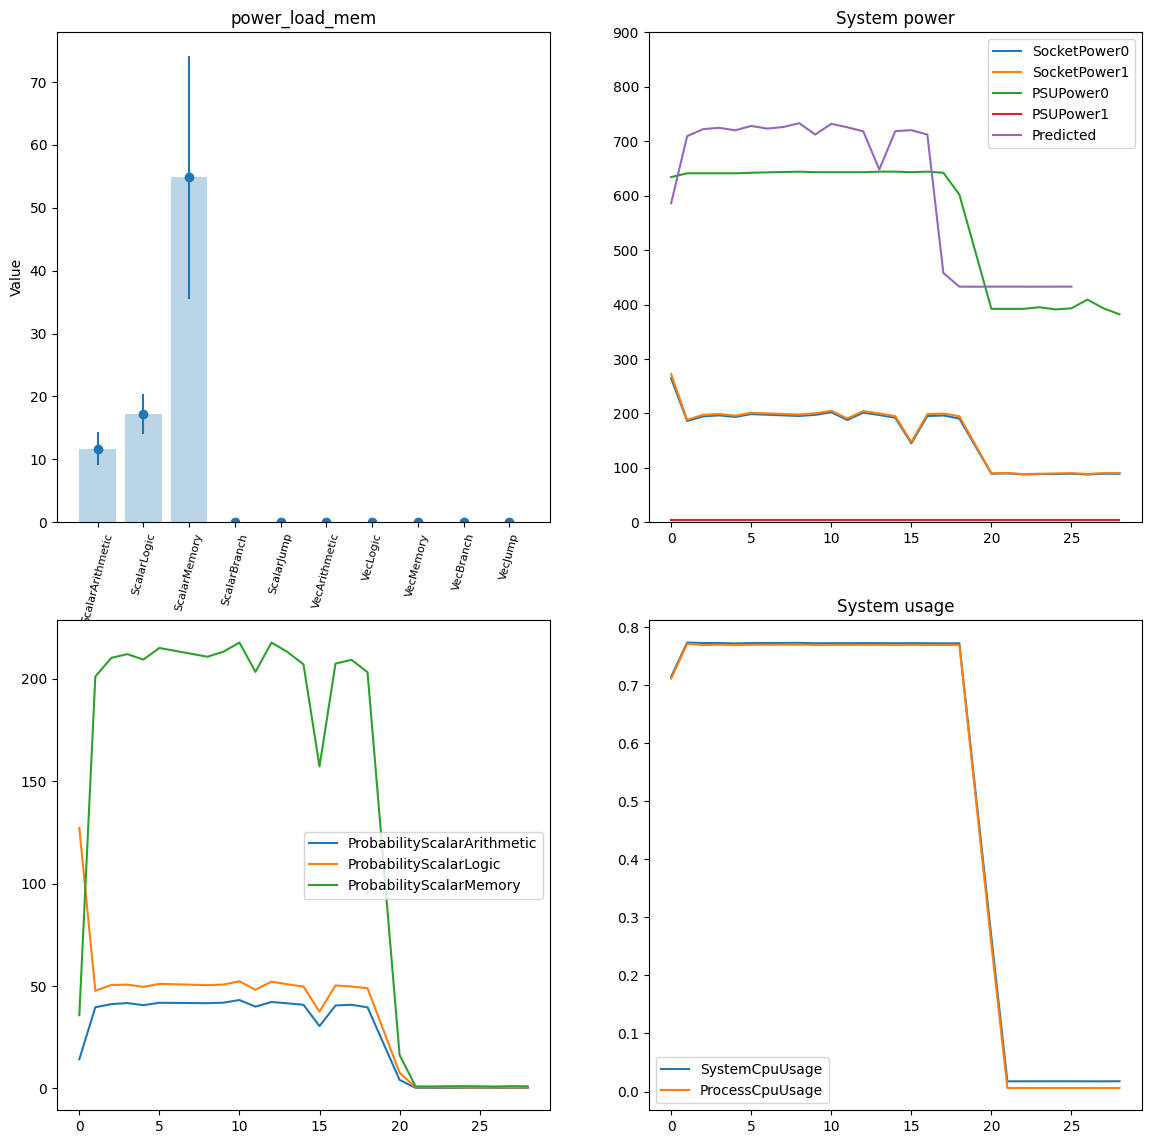

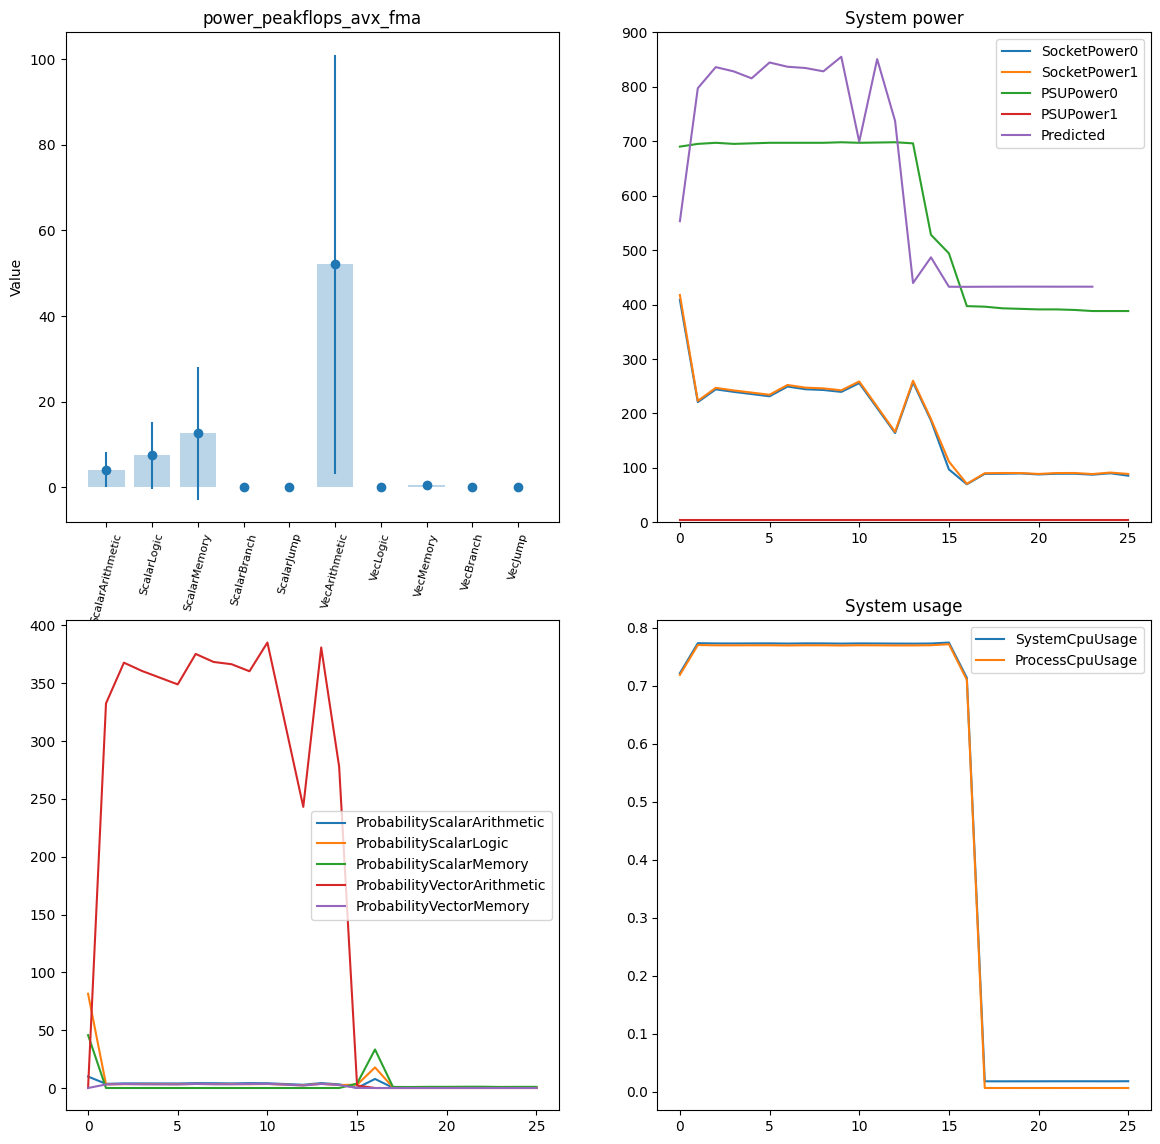

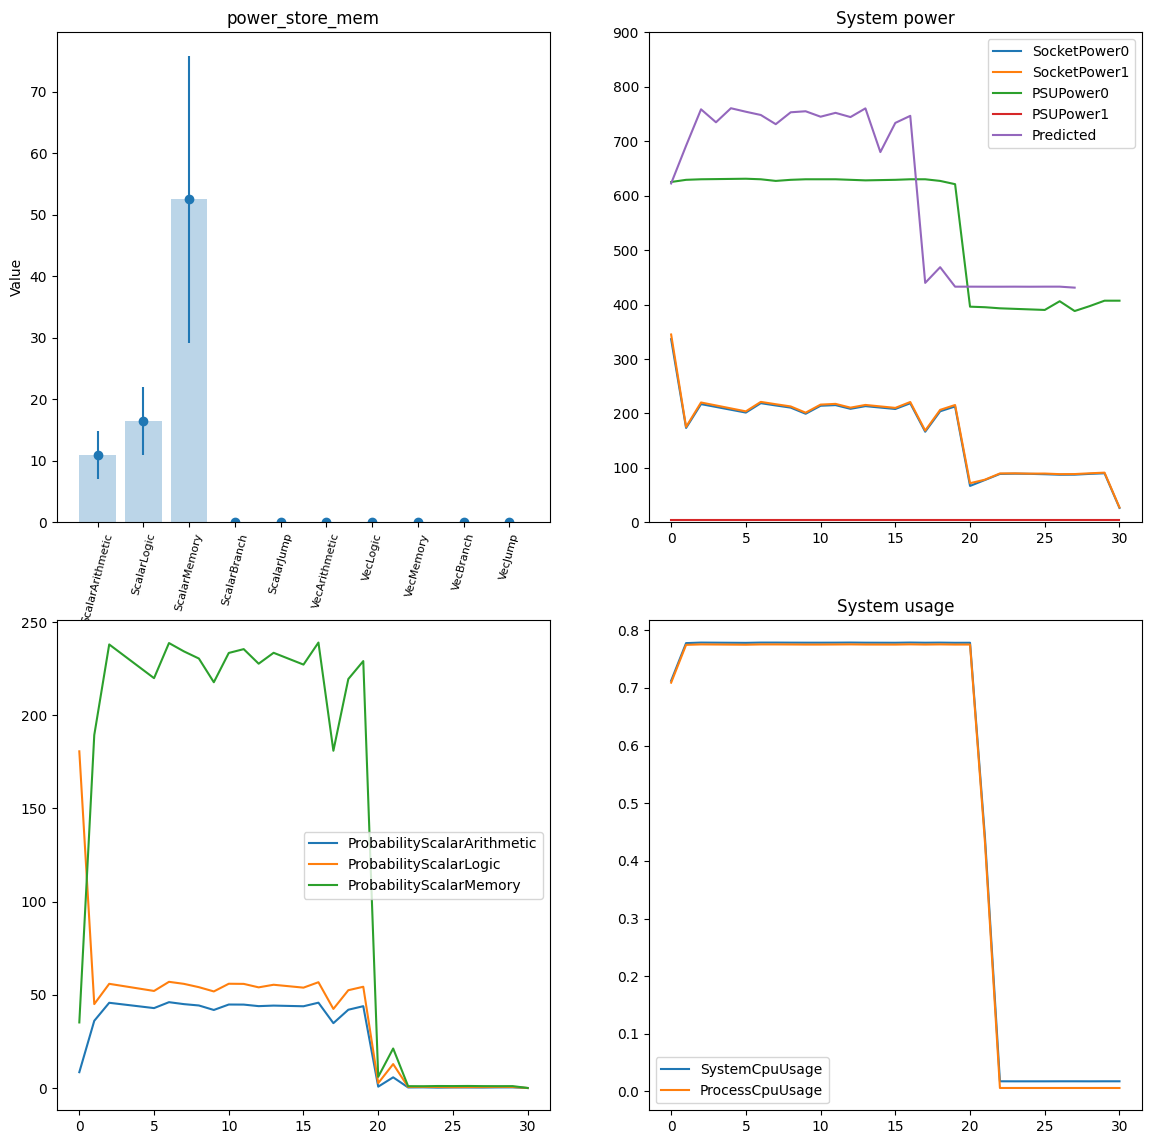

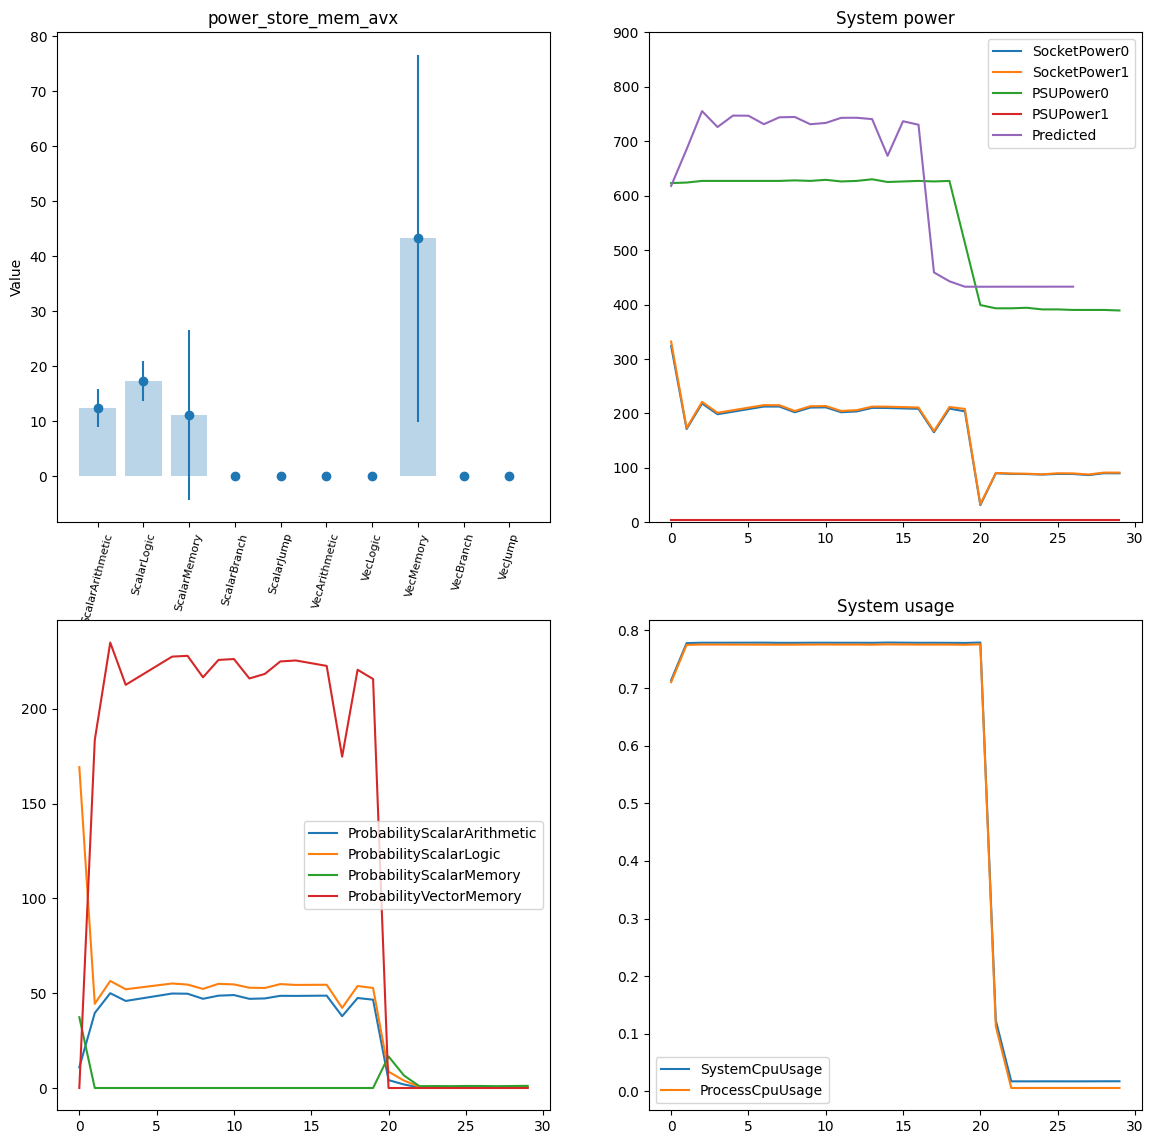

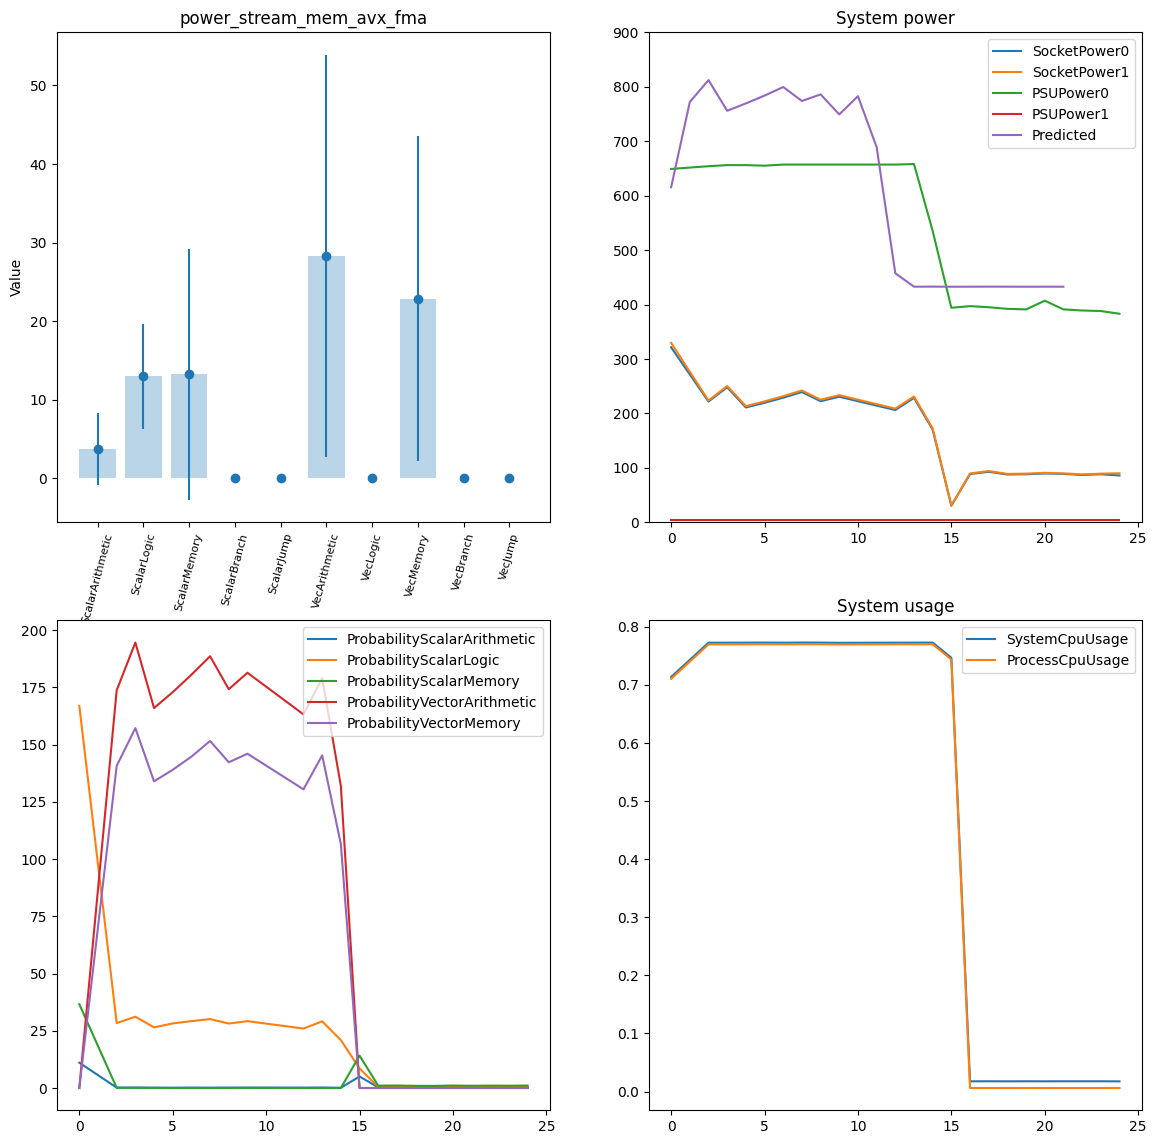

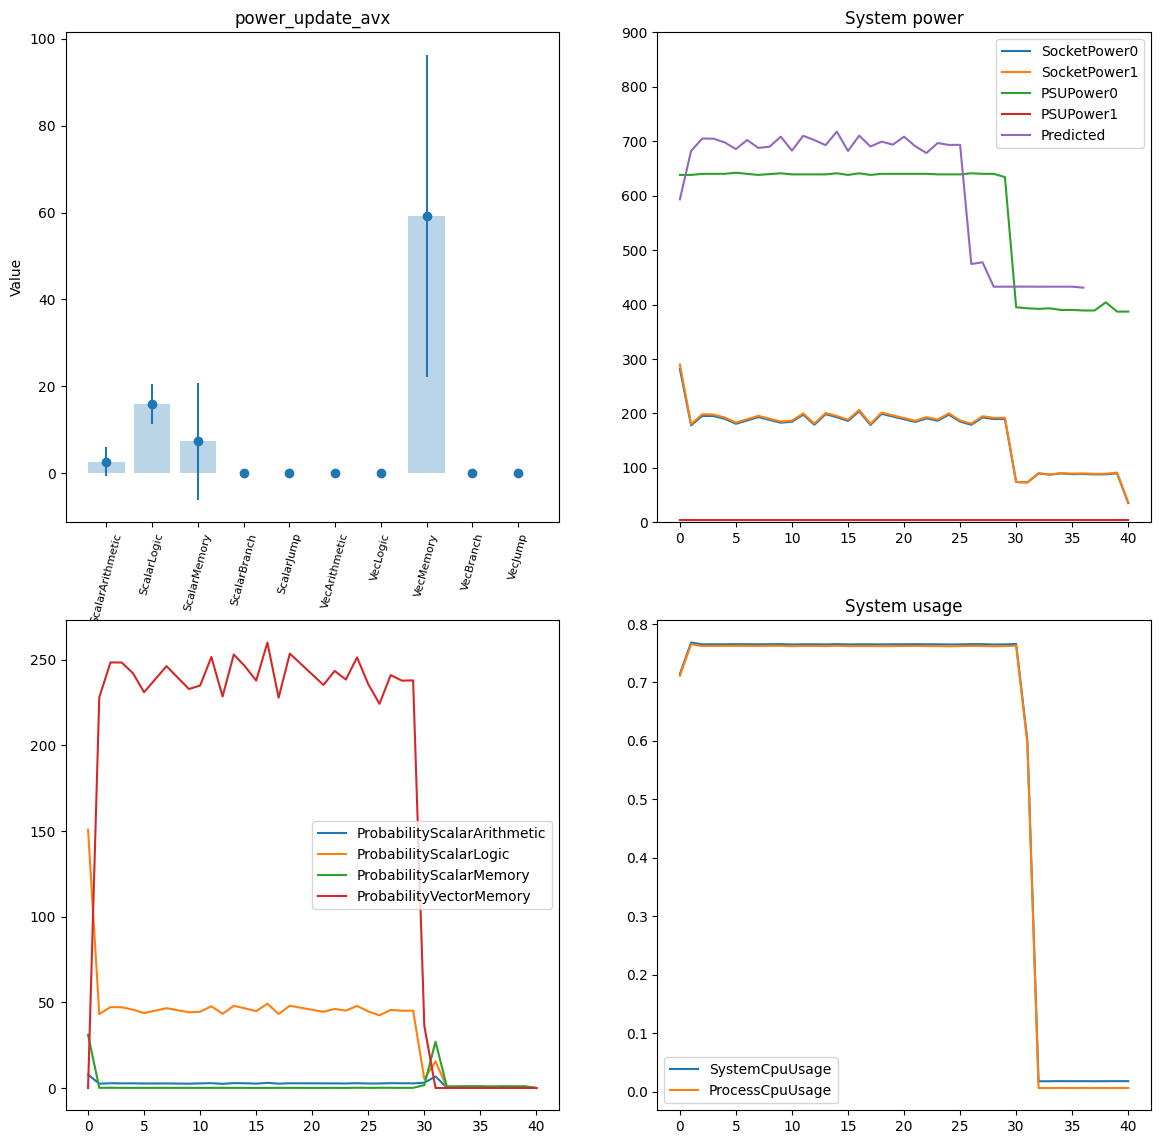

In [842]:
directory_list=["results_128"]

df_list=list()
for directory in directory_list:
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            try:
                df = pd.read_csv(os.path.join(directory, filename))
                df_list.append(df)
                print(f"Opened file: {filename}")
                #print(df.head())  # prints the first 5 rows of each CSV file
                plot(df,os.path.basename(filename).split(".")[0],coeff)
            except Exception as e:
                print(e)
